#### Import Required Libraries

In [ ]:
# These libraries are essential for data handling, visualization, and analysis.

# Data manipulation
import pandas as pd
import numpy as np
import itertools
import datetime
import time
import math
from math import sqrt

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import YearLocator, DateFormatter
from wordcloud import WordCloud

# Machine Learning - Time Series
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# Metrics and utilities
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Text processing and NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from transformers import pipeline, AutoTokenizer
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Social Media API
import praw


#### England and Wales

#### Load England and Wales Data

In [2]:
# Define file path
england_wales_file_path = "main (1).xlsx"

In [3]:
# Load England data from Table 6 (starting at row 5 due to headers)
df_england_raw = pd.read_excel(england_wales_file_path, sheet_name="Table_6", header=4)
df_england_raw.head()

,Area code \n[note 2],Area of usual residence \n[note 2],Sex,Year of death registration \n[note 3],10-14 \nNumber of deaths,"10-14 \nRate per 100,000 \n[note 5]",10-14 \nMarker \n[note 7],10-14 \nLCL \n[note 6],10-14 \nUCL \n[note 6],15-19 \nNumber of deaths,...,85-89 \nNumber of deaths,"85-89 \nRate per 100,000 \n[note 5]",85-89 \nMarker \n[note 7],85-89 \nLCL \n[note 6],85-89 \nUCL \n[note 6],90+ \nNumber of deaths,"90+ \nRate per 100,000 \n[note 5]",90+ \nMarker \n[note 7],90+ \nLCL \n[note 6],90+ \nUCL \n[note 6]
0,E92000001,England,Persons,2023,24,0.7,NaN,0.4,1,177,...,90,9.7,NaN,7.8,12.0,60,11.5,NaN,8.8,14.8
1,E92000001,England,Persons,2022,17,0.5,[u],0.3,0.8,168,...,85,9.4,NaN,7.5,11.6,66,12.7,NaN,9.8,16.1
2,E92000001,England,Persons,2021,14,0.4,[u],0.2,0.7,198,...,77,8.7,NaN,6.9,10.9,43,8.4,NaN,6.1,11.4
3,E92000001,England,Persons,2020,14,0.4,[u],0.2,0.7,147,...,84,9.7,NaN,7.7,12.0,51,10.2,NaN,7.6,13.4
4,E92000001,England,Persons,2019,10,0.3,[u],0.1,0.6,176,...,83,9.6,NaN,7.6,11.9,40,8.0,NaN,5.7,10.8


In [4]:
# Load Wales data from Table 7 (also starting at row 5)
df_wales_raw = pd.read_excel(england_wales_file_path, sheet_name="Table_7", header=4)
df_wales_raw.head()

,Area code \n[note 2],Area of usual residence \n[note 2],Sex,Year of death registration \n[note 3],10-14 \nNumber of deaths,"10-14 \nRate per 100,000 \n[note 5]",10-14 \nMarker \n[note 7],10-14 \nLCL \n[note 6],10-14 \nUCL \n[note 6],15-19 \nNumber of deaths,...,85-89 \nNumber of deaths,"85-89 \nRate per 100,000 \n[note 5]",85-89 \nMarker \n[note 7],85-89 \nLCL \n[note 6],85-89 \nUCL \n[note 6],90+ \nNumber of deaths,"90+ \nRate per 100,000 \n[note 5]",90+ \nMarker \n[note 7],90+ \nLCL \n[note 6],90+ \nUCL \n[note 6]
0,W92000004,Wales,Persons,2023,1,[x],NaN,[x],[x],14,...,5,9,[u],2.9,21,2,[x],NaN,[x],[x]
1,W92000004,Wales,Persons,2022,1,[x],NaN,[x],[x],10,...,6,11,[u],4,23.9,7,22.9,[u],9.2,47.3
2,W92000004,Wales,Persons,2021,0,[x],NaN,[x],[x],17,...,3,5.6,[u],1.2,16.3,0,[x],NaN,[x],[x]
3,W92000004,Wales,Persons,2020,0,[x],NaN,[x],[x],12,...,5,9.4,[u],3.1,22,6,20,[u],7.3,43.6
4,W92000004,Wales,Persons,2019,1,[x],NaN,[x],[x],6,...,3,5.7,[u],1.2,16.7,4,13.5,[u],3.7,34.4


#### Data Cleaning & Transformation - England & Wales

In [5]:
# Define identifier columns that remain unchanged during reshaping
id_vars = [
    'Area of usual residence \n[note 2]',
    'Sex',
    'Year of death registration \n[note 3]'
]

# Function to reshape data: extract age-specific death counts and rates
# Converts from wide to long format
def extract_and_clean(df):
    death_cols = [col for col in df.columns if "Number of deaths" in col]
    rate_cols = [col for col in df.columns if "Rate per 100,000" in col]
    
    # Reshape number of deaths by age group
    df_deaths_long = df.melt(id_vars=id_vars, value_vars=death_cols,
                    var_name='Age Group', value_name='Deaths')
    
    # Reshape rate per 100,000
    df_rates_long = df.melt(id_vars=id_vars, value_vars=rate_cols,
                   var_name='Age Group', value_name='Rate (per 100,000)')
    
    # Align age group names
    df_deaths_long['Age Group'] = df_deaths_long['Age Group'].str.extract(r'(\d{2,3}\+?[–-]?\d{0,2})')
    df_rates_long['Age Group'] = df_rates_long['Age Group'].str.extract(r'^(\d{1,3}[\+–-]?\d{0,3})')
    
    # Merge the two long-format dataframes on ID + Age Group
    df_clean = pd.merge(df_deaths_long, df_rates_long, on=id_vars + ['Age Group'])
    return df_clean

In [6]:
# Apply transformation to both datasets

In [7]:
df_england_data = extract_and_clean(df_england_raw)
df_england_data

,Area of usual residence \n[note 2],Sex,Year of death registration \n[note 3],Age Group,Deaths,"Rate (per 100,000)"
0,England,Persons,2023,10-14,24,0.7
1,England,Persons,2022,10-14,17,0.5
2,England,Persons,2021,10-14,14,0.4
3,England,Persons,2020,10-14,14,0.4
4,England,Persons,2019,10-14,10,0.3
...,...,...,...,...,...,...
2188,England,Females,1985,90+,13,9.7
2189,England,Females,1984,90+,12,9.3
2190,England,Females,1983,90+,10,8.0
2191,England,Females,1982,90+,12,9.9


In [8]:
df_wales_data = extract_and_clean(df_wales_raw)
df_wales_data

,Area of usual residence \n[note 2],Sex,Year of death registration \n[note 3],Age Group,Deaths,"Rate (per 100,000)"
0,Wales,Persons,2023,10-14,1,[x]
1,Wales,Persons,2022,10-14,1,[x]
2,Wales,Persons,2021,10-14,0,[x]
3,Wales,Persons,2020,10-14,0,[x]
4,Wales,Persons,2019,10-14,1,[x]
...,...,...,...,...,...,...
2188,Wales,Females,1985,90+,0,[x]
2189,Wales,Females,1984,90+,0,[x]
2190,Wales,Females,1983,90+,1,[x]
2191,Wales,Females,1982,90+,0,[x]


 Note - Age-standardised rates are not calculated when there are fewer than 10 deaths. 
        Age-specific rates are not calculated when there are fewer than 3 deaths. These cases are 
        marked with [x] to inform users that the rate has been suppressed. It is our best practice 
        not to calculate rates based on such small numbers, as they are imprecise and susceptible 
        to inaccurate interpretation.

In [9]:
# Filter specific age group (example: 25-29)
df_wales_25_29 = df_wales_data[df_wales_data['Age Group'] == '25-29']
df_wales_25_29

,Area of usual residence \n[note 2],Sex,Year of death registration \n[note 3],Age Group,Deaths,"Rate (per 100,000)"
387,Wales,Persons,2023,25-29,32,16.8
388,Wales,Persons,2022,25-29,22,11.7
389,Wales,Persons,2021,25-29,29,15.6
390,Wales,Persons,2020,25-29,24,12.7
391,Wales,Persons,2019,25-29,31,16.3
...,...,...,...,...,...,...
511,Wales,Females,1985,25-29,2,[x]
512,Wales,Females,1984,25-29,3,3.4
513,Wales,Females,1983,25-29,3,3.4
514,Wales,Females,1982,25-29,5,5.6


In [10]:
# Rename columns for clarity and consistency

In [11]:
df_england_data.rename(columns={
    'Area of usual residence \n[note 2]': 'Nation',
    'Year of death registration \n[note 3]': 'Year'
}, inplace=True)
df_england_data.head()

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
0,England,Persons,2023,10-14,24,0.7
1,England,Persons,2022,10-14,17,0.5
2,England,Persons,2021,10-14,14,0.4
3,England,Persons,2020,10-14,14,0.4
4,England,Persons,2019,10-14,10,0.3


In [12]:
df_wales_data.rename(columns={
    'Area of usual residence \n[note 2]': 'Nation',
    'Year of death registration \n[note 3]': 'Year'
}, inplace=True)
df_wales_data.head()

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
0,Wales,Persons,2023,10-14,1,[x]
1,Wales,Persons,2022,10-14,1,[x]
2,Wales,Persons,2021,10-14,0,[x]
3,Wales,Persons,2020,10-14,0,[x]
4,Wales,Persons,2019,10-14,1,[x]


In [13]:
# Filter data between 2005 and 2023 (relevant recent period)
df_england_filtered = df_england_data[(df_england_data["Year"] >= 2005) & (df_england_data["Year"] <= 2023)]
df_wales_filtered = df_wales_data[(df_wales_data["Year"] >= 2005) & (df_wales_data["Year"] <= 2023)]

In [14]:
# Remove 'Persons' category to keep Male/Female distinction
df_england_filtered = df_england_filtered[df_england_filtered["Sex"] != "Persons"]
df_wales_filtered = df_wales_filtered[df_wales_filtered["Sex"] != "Persons"]

In [15]:
# Remove younger age group with sparse data
df_england_filtered = df_england_filtered[df_england_filtered["Age Group"] != "10-14"]
df_wales_filtered = df_wales_filtered[df_wales_filtered["Age Group"] != "10-14"]

In [16]:
# Preview cleaned England data
df_england_filtered

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
172,England,Males,2023,15-19,138,7.9
173,England,Males,2022,15-19,117,6.9
174,England,Males,2021,15-19,135,8.2
175,England,Males,2020,15-19,106,6.5
176,England,Males,2019,15-19,118,7.4
...,...,...,...,...,...,...
2164,England,Females,2009,90+,18,6.8
2165,England,Females,2008,90+,13,5.0
2166,England,Females,2007,90+,9,3.4
2167,England,Females,2006,90+,13,4.8


In [17]:
# Preview cleaned Wales data
df_wales_filtered

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
172,Wales,Males,2023,15-19,9,9.4
173,Wales,Males,2022,15-19,7,7.6
174,Wales,Males,2021,15-19,16,17.7
175,Wales,Males,2020,15-19,8,9
176,Wales,Males,2019,15-19,2,[x]
...,...,...,...,...,...,...
2164,Wales,Females,2009,90+,1,[x]
2165,Wales,Females,2008,90+,1,[x]
2166,Wales,Females,2007,90+,1,[x]
2167,Wales,Females,2006,90+,1,[x]


#### Consolidate Age Bands and Finalize Datasets -  England & Wales

In [18]:
# Age bands are remapped into broader categories for general trend analysis.

In [19]:
age_band_map = {
    "15-19": "15-34", "20-24": "15-34", "25-29": "15-34", "30-34": "15-34",
    "35-39": "35-44", "40-44": "35-44",
    "45-49": "45-54", "50-54": "45-54",
    "55-59": "55-64", "60-64": "55-64",
    "65-69": "65+", "70-74": "65+", "75-79": "65+", "80-84": "65+", "85-89": "65+", "90+": "65+"
}

In [20]:
# Apply the age band mapping
df_england_filtered["Age Group"] = df_england_filtered["Age Group"].map(age_band_map)
df_wales_filtered["Age Group"] = df_wales_filtered["Age Group"].map(age_band_map)

In [21]:
# Drop rows with unmapped age groups (NaN)
df_england_filtered = df_england_filtered.dropna(subset=["Age Group"])
df_wales_filtered = df_wales_filtered.dropna(subset=["Age Group"])

In [22]:
print(df_england_filtered.dtypes)
print(df_wales_filtered.dtypes)

Nation                object
Sex                   object
Year                   int64
Age Group             object
Deaths                 int64
Rate (per 100,000)    object
dtype: object
Nation                object
Sex                   object
Year                   int64
Age Group             object
Deaths                 int64
Rate (per 100,000)    object
dtype: object


In [23]:
# Ensure Rate is numeric and drop NaNs

In [24]:
df_england_filtered["Rate (per 100,000)"] = pd.to_numeric(df_england_filtered["Rate (per 100,000)"], errors='coerce')
df_wales_filtered["Rate (per 100,000)"] = pd.to_numeric(df_wales_filtered["Rate (per 100,000)"], errors='coerce')

In [25]:
df_england_filtered.dropna(subset=["Rate (per 100,000)"], inplace=True)
df_wales_filtered.dropna(subset=["Rate (per 100,000)"], inplace=True)

In [26]:
# Normalize 'Sex' column values
df_england_filtered["Sex"] = df_england_filtered["Sex"].replace({
    "Males": "Male",
    "Females": "Female"
})

df_wales_filtered["Sex"] = df_wales_filtered["Sex"].replace({
    "Males": "Male",
    "Females": "Female"
})

In [27]:
print(df_england_filtered.dtypes)
print(df_wales_filtered.dtypes)

Nation                 object
Sex                    object
Year                    int64
Age Group              object
Deaths                  int64
Rate (per 100,000)    float64
dtype: object
Nation                 object
Sex                    object
Year                    int64
Age Group              object
Deaths                  int64
Rate (per 100,000)    float64
dtype: object


In [28]:
# Final aggregation: sum deaths, average rates
df_england = df_england_filtered.groupby(
    ["Nation", "Year", "Sex", "Age Group"], as_index=False
).agg({
    "Deaths": "sum",
    "Rate (per 100,000)": "mean"
})

df_england["Rate (per 100,000)"] = df_england["Rate (per 100,000)"].round(2)

df_wales = df_wales_filtered.groupby(
    ["Nation", "Year", "Sex", "Age Group"], as_index=False
).agg({
    "Deaths": "sum",
    "Rate (per 100,000)": "mean"
})

df_wales["Rate (per 100,000)"] = df_wales["Rate (per 100,000)"].round(2)

In [29]:
df_england

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
0,England,2005,Female,15-34,270,4.05
1,England,2005,Female,35-44,245,6.30
2,England,2005,Female,45-54,241,7.50
3,England,2005,Female,55-64,178,5.95
4,England,2005,Female,65+,223,5.37
...,...,...,...,...,...,...
185,England,2023,Male,15-34,1056,14.25
186,England,2023,Male,35-44,842,22.45
187,England,2023,Male,45-54,860,24.20
188,England,2023,Male,55-64,728,20.15


In [30]:
# Check number of rows
df_england.shape[0]

190

#### Export Processed Data -  England 

In [31]:
# Save the cleaned and processed datasets for visualization.

In [32]:
df_england.to_csv("England_cleaned.csv", index=False)

In [33]:
# Summary of numeric columns
print(df_england.describe())

              Year       Deaths  Rate (per 100,000)
count   190.000000   190.000000          190.000000
mean   2014.000000   469.505263           11.321474
std       5.491696   273.757332            6.582247
min    2005.000000   150.000000            2.900000
25%    2009.000000   218.500000            5.350000
50%    2014.000000   403.500000            9.765000
75%    2019.000000   706.000000           16.410000
max    2023.000000  1144.000000           24.850000


#### Visualization -  England 

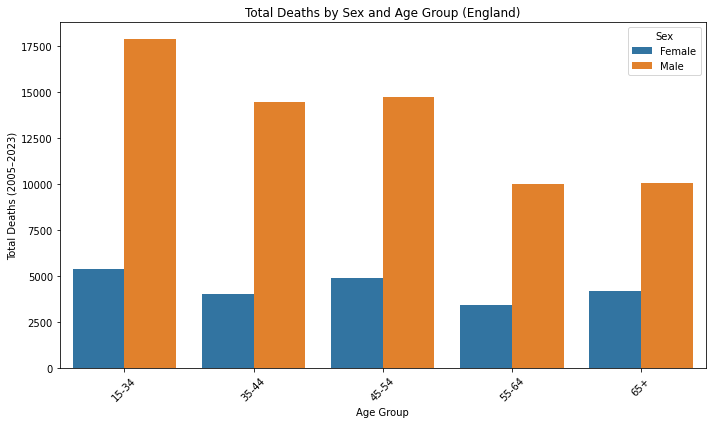

In [34]:
# Total Sucides occured in England by Sex and Age Group

# Group data
grouped = df_england.groupby(['Sex', 'Age Group'])['Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Deaths', hue='Sex')
plt.title('Total Deaths by Sex and Age Group (England)')
plt.ylabel('Total Deaths (2005–2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

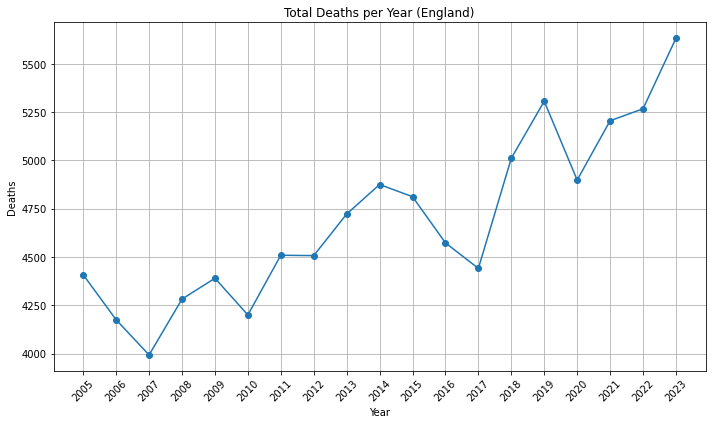

In [35]:
# Total Sucides in England per year

yearly_deaths = df_england.groupby('Year')['Deaths'].sum()
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths, marker='o', linestyle='-')
plt.title('Total Deaths per Year (England)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(yearly_deaths.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

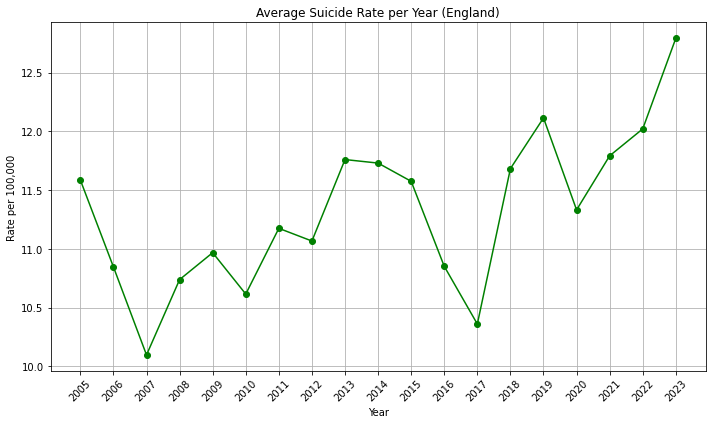

In [36]:
# Average Suicide rate in England per year

yearly_rate = df_england.groupby('Year')['Rate (per 100,000)'].mean()
# plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 6))
plt.plot(yearly_rate.index, yearly_rate.values, marker='o', linestyle='-', color='green')
plt.title('Average Suicide Rate per Year (England)')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.xticks(yearly_rate.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

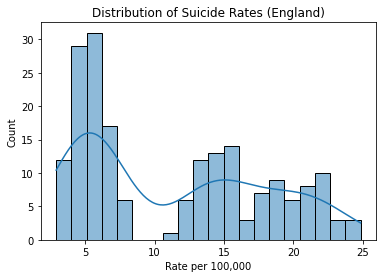

In [37]:
# Distribution of death rates in England

sns.histplot(df_england['Rate (per 100,000)'], kde=True, bins=20)
plt.title('Distribution of Suicide Rates (England)')
plt.xlabel('Rate per 100,000')
plt.show()

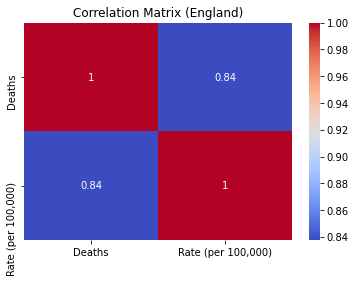

In [38]:
# Correlation between Deaths and Rate in England

numeric_df = df_england[['Deaths', 'Rate (per 100,000)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (England)')
plt.show()

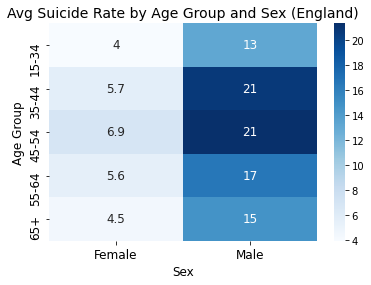

In [39]:
# Average Suicide rate in England by Age Group and Sex

pivot_sex_age = df_england.pivot_table(index='Age Group', columns='Sex', values='Rate (per 100,000)', aggfunc='mean')
sns.heatmap(pivot_sex_age, annot=True, cmap='Blues', annot_kws={"size": 12})
plt.title('Avg Suicide Rate by Age Group and Sex (England)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.show()

In [40]:
df_wales

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
0,Wales,2005,Female,15-34,10,10.80
1,Wales,2005,Female,35-44,8,3.65
2,Wales,2005,Female,45-54,12,6.20
3,Wales,2005,Female,55-64,9,4.55
4,Wales,2005,Female,65+,6,4.55
...,...,...,...,...,...,...
185,Wales,2023,Male,15-34,84,21.58
186,Wales,2023,Male,35-44,56,29.70
187,Wales,2023,Male,45-54,57,30.65
188,Wales,2023,Male,55-64,41,19.30


In [41]:
df_wales.shape

(190, 6)

#### Export Processed Data - Wales

In [42]:
# Save the cleaned and processed datasets for visualization.

In [43]:
df_wales.to_csv("Wales_cleaned.csv", index=False)

In [44]:
# Summary of numeric columns
print(df_wales.describe())

              Year      Deaths  Rate (per 100,000)
count   190.000000  190.000000          190.000000
mean   2014.000000   31.110526           14.144789
std       5.491696   21.268587            8.689452
min    2005.000000    3.000000            2.750000
25%    2009.000000   13.250000            6.500000
50%    2014.000000   24.000000           11.675000
75%    2019.000000   48.000000           21.145000
max    2023.000000   89.000000           36.950000


#### Visualization - Wales

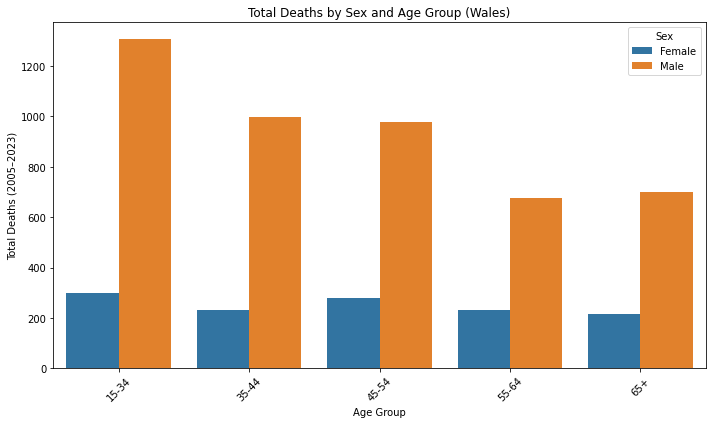

In [45]:
# Total Sucides occured in Wales by Sex and Age Group

# Group data
grouped = df_wales.groupby(['Sex', 'Age Group'])['Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Deaths', hue='Sex')
plt.title('Total Deaths by Sex and Age Group (Wales)')
plt.ylabel('Total Deaths (2005–2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

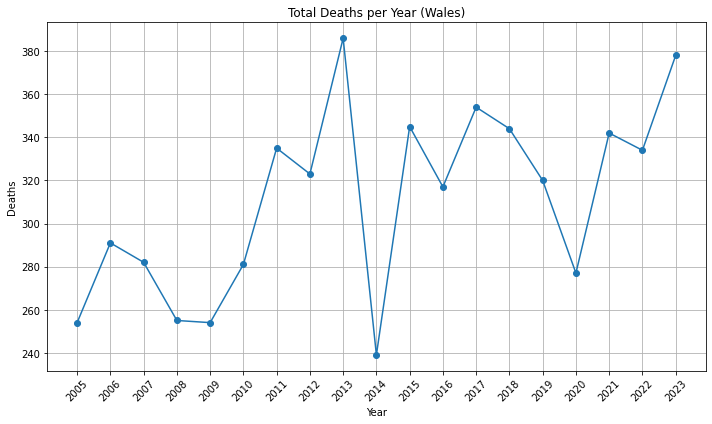

In [46]:
# Total Sucides in Wales per year

yearly_deaths = df_wales.groupby('Year')['Deaths'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', linestyle='-')
plt.title('Total Deaths per Year (Wales)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(yearly_deaths.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

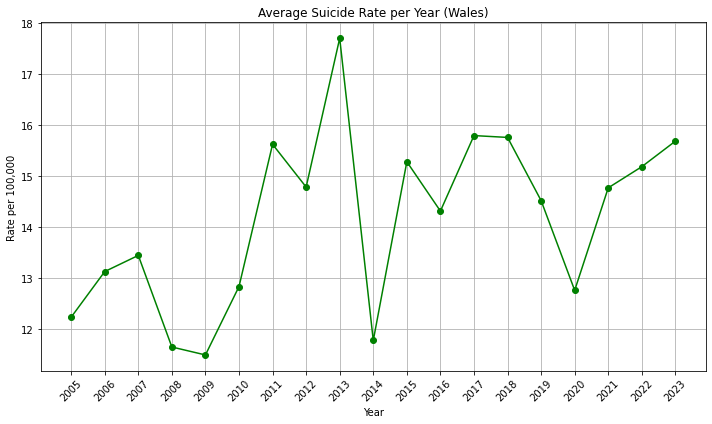

In [47]:
# Average Suicide rate in Wales per year

yearly_rate = df_wales.groupby('Year')['Rate (per 100,000)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_rate.index, yearly_rate.values, marker='o', linestyle='-', color='green')
plt.title('Average Suicide Rate per Year (Wales)')
plt.xlabel('Year')
plt.ylabel('Rate per 100,000')
plt.xticks(yearly_rate.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

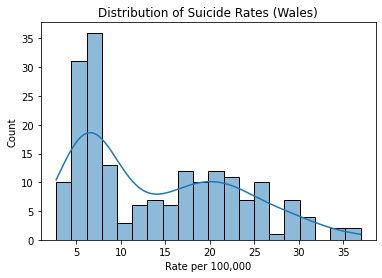

In [48]:
# Distribution of death rates in Wales

sns.histplot(df_wales['Rate (per 100,000)'], kde=True, bins=20)
plt.title('Distribution of Suicide Rates (Wales)')
plt.xlabel('Rate per 100,000')
plt.show()

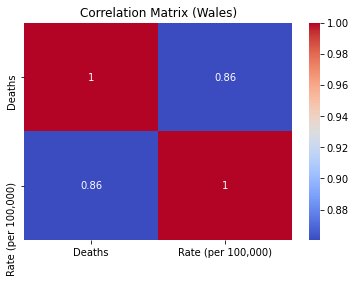

In [49]:
# Correlation between Deaths and Rate in Wales

numeric_df = df_wales[['Deaths', 'Rate (per 100,000)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Wales)')
plt.show()

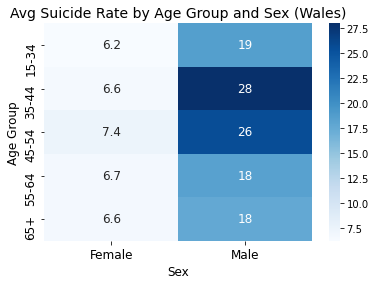

In [50]:
# Average Suicide rate in Wales by Age Group and Sex

pivot_sex_age = df_wales.pivot_table(index='Age Group', columns='Sex', values='Rate (per 100,000)', aggfunc='mean')
sns.heatmap(pivot_sex_age, annot=True, cmap='Blues', annot_kws={"size": 12})
plt.title('Avg Suicide Rate by Age Group and Sex (Wales)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.show()

### Scotland

#### Load Scotland Data

In [51]:
# Define file path
scotland_file_path = "probable-suicides-2023-data.xlsx"

In [52]:
# Load Scotland data from Table_2A for number of Deaths(starting at row 5 due to headers)
df_deaths = pd.read_excel(scotland_file_path, sheet_name='Table_2A', header=4)
df_deaths.head()

,Year,Sex,Measure,Age 0-4,Age 5-9,Age 10-14,Age 15-19,Age 20-24,Age 25-29,Age 30-34,...,Age 45-49,Age 50-54,Age 55-59,Age 60-64,Age 65-69,Age 70-74,Age 75-79,Age 80-84,Age 85+,Average age at death
0,1974,Persons,Number of deaths,3,1,3,22,40,51,47,...,71,59,63,39,55,46,18,13,4,48.121495
1,1975,Persons,Number of deaths,1,1,8,22,54,45,37,...,88,71,66,60,41,45,27,7,7,48.417151
2,1976,Persons,Number of deaths,2,1,2,28,55,51,53,...,70,57,47,63,48,32,17,9,2,46.376712
3,1977,Persons,Number of deaths,2,0,1,24,51,48,55,...,67,70,68,43,45,38,21,9,3,47.286039
4,1978,Persons,Number of deaths,0,1,3,30,47,59,56,...,81,58,70,65,49,36,29,4,5,47.339557


In [53]:
# Load Scotland data from Table_2B for suicide rates per 100,000 population(starting at row 5 due to headers)
df_rates = pd.read_excel(scotland_file_path, sheet_name='Table_2B', header=4)
df_rates.head()

,Year,Sex,Measure,Age 0,Age 1-4,Age 5-9,Age 10-14,Age 15-19,Age 20-24,Age 25-29,...,Age 45-49,Age 50-54,Age 55-59,Age 60-64,Age 65-69,Age 70-74,Age 75-79,Age 80-84,Age 85-89,Age 90 or more
0,1994,Persons,Age-specific rate,0.0,0.0,0.3,1.2,11.8,22.9,26.1,...,24.8,18.1,17.1,16.9,16.2,10.6,15.9,15.2,18.5,13.3
1,1995,Persons,Age-specific rate,1.7,0.8,0.0,1.9,11.4,19.9,26.1,...,24.5,22.1,20.3,13.9,17.9,10.9,19.3,12.2,12.5,17.0
2,1996,Persons,Age-specific rate,1.7,0.4,0.6,1.6,10.6,24.1,27.6,...,24.8,19.9,17.6,10.8,19.6,16.3,15.9,17.1,21.2,37.0
3,1997,Persons,Age-specific rate,3.4,0.4,0.3,1.2,12.7,27.0,29.8,...,21.5,24.2,16.5,13.6,18.3,12.1,17.0,14.7,12.1,0.0
4,1998,Persons,Age-specific rate,0.0,0.0,0.0,1.5,12.9,23.6,31.9,...,23.6,15.8,18.8,12.3,17.5,21.4,14.6,14.3,10.2,7.7


#### Data Cleaning & Transformation - Scotland

In [54]:
# Prepare data for Scotland by converting to long format, filtering, and renaming.

In [55]:
#  Converts from wide to long format

# Reshape the number of deaths: unpivot age-specific death counts
df_deaths_long = df_deaths.melt(
    # Retain Year, Sex, and Measure columns
    id_vars=['Year', 'Sex', 'Measure'], 
    # New column for age group labels
    var_name='Age Group', 
    # New column for the number of deaths
    value_name='Deaths'
)

# Reshape the suicide rates: unpivot age-specific rate values
df_rates_long = df_rates.melt(
    id_vars=['Year', 'Sex', 'Measure'], 
    var_name='Age Group', 
    # New column for rate values
    value_name='Rate (per 100,000)'
)

In [56]:
# Drop the 'Measure' column from both long-format tables
df_deaths_long = df_deaths_long.drop(columns='Measure')
df_rates_long = df_rates_long.drop(columns='Measure')

In [57]:
# Merge deaths and rates into a unified dataset
# We perform an inner join on ['Year', 'Sex', 'Age Group'] to align death counts with corresponding rates.
df_combined = pd.merge(
    df_deaths_long,
    df_rates_long,
    on=['Year', 'Sex', 'Age Group'],
    # Ensures we retain only rows where both death and rate values exist
    how='inner'
)

In [58]:
# To maintain consistency with England and Wales datasets, we:
#  1. Add a new column 'Nation' with the value "Scotland"
#  2. Reorder and retain only the necessary columns for analysis and export

In [59]:
# Add a new column 'Nation' with the value "Scotland"
df_combined['Nation'] = 'Scotland'

In [60]:
# Select and reorder final columns of interest
df_scotland_data = df_combined[['Nation', 'Sex', 'Year', 'Age Group', 'Deaths', 'Rate (per 100,000)']]
df_scotland_data

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
0,Scotland,Persons,1994,Age 5-9,1.0,0.3
1,Scotland,Persons,1995,Age 5-9,0.0,0.0
2,Scotland,Persons,1996,Age 5-9,2.0,0.6
3,Scotland,Persons,1997,Age 5-9,1.0,0.3
4,Scotland,Persons,1998,Age 5-9,0.0,0.0
...,...,...,...,...,...,...
1435,Scotland,Males,2019,Age 80-84,7.0,11.7
1436,Scotland,Males,2020,Age 80-84,8.0,13.3
1437,Scotland,Males,2021,Age 80-84,7.0,11.7
1438,Scotland,Males,2022,Age 80-84,10.0,16.5


In [61]:
#  Filter Scotland Data by Year, Sex, and Age Group

In [62]:
# Include only years between 2005 and 2023
df_scotland_filtered = df_scotland_data[(df_scotland_data["Year"] >= 2005) & (df_scotland_data["Year"] <= 2023)]

In [63]:
# Exclude aggregate sex category 'Persons' to maintain gender-specific granularity
df_scotland_filtered = df_scotland_filtered[df_scotland_filtered["Sex"] != "Persons"]

In [64]:
# Remove the '10–14' age group due to unreliable or sparse data
df_scotland_filtered = df_scotland_filtered[df_scotland_filtered["Age Group"] != "10-14"]

In [65]:
# Preview filtered Scotland dataset
df_scotland_filtered

,Nation,Sex,Year,Age Group,Deaths,"Rate (per 100,000)"
41,Scotland,Females,2005,Age 5-9,0.0,0.0
42,Scotland,Females,2006,Age 5-9,0.0,0.0
43,Scotland,Females,2007,Age 5-9,0.0,0.0
44,Scotland,Females,2008,Age 5-9,0.0,0.0
45,Scotland,Females,2009,Age 5-9,0.0,0.0
...,...,...,...,...,...,...
1435,Scotland,Males,2019,Age 80-84,7.0,11.7
1436,Scotland,Males,2020,Age 80-84,8.0,13.3
1437,Scotland,Males,2021,Age 80-84,7.0,11.7
1438,Scotland,Males,2022,Age 80-84,10.0,16.5


#### Consolidate Age Bands and Finalize Datasets -  Scotland

In [66]:
# Age bands are remapped into broader categories for general trend analysis.

In [67]:
age_band_map = {
    "Age 15-19": "15-34", "Age 20-24": "15-34", "Age 25-29": "15-34", "Age 30-34": "15-34",
    "Age 35-39": "35-44", "Age 40-44": "35-44",
    "Age 45-49": "45-54", "Age 50-54": "45-54",
    "Age 55-59": "55-64", "Age 60-64": "55-64",
    "Age 65-69": "65+", "Age 70-74": "65+", "Age 75-79": "65+", "Age 80-84": "65+", "85-89": "65+", "90+": "65+"
}

In [68]:
# Apply the mapping to create a unified 'Age Group' variable
df_scotland_filtered["Age Group"] = df_scotland_filtered["Age Group"].map(age_band_map)

In [69]:
# Drop rows with unmapped age groups (NaN)
df_scotland_filtered = df_scotland_filtered.dropna(subset=["Age Group"])

In [70]:
# To maintain consistency across all national datasets (England, Wales, Scotland),
# the values in the 'Sex' column are standardized. The original entries "Males" and "Females"
# are replaced with "Male" and "Female", respectively.
df_scotland_filtered.loc[:, "Sex"] = df_scotland_filtered["Sex"].replace({
    "Males": "Male",
    "Females": "Female"
})

In [71]:
# Aggregate the dataset by Nation, Year, Sex, and Age Group
# - Deaths are summed to get total suicide counts for each demographic group
# - Rates are averaged to reflect consistent population-adjusted trends
df_scotland = df_scotland_filtered.groupby(
    ["Nation", "Year", "Sex", "Age Group"], as_index=False
).agg({
    "Deaths": "sum",
    "Rate (per 100,000)": "mean"
})
# Round rates to two decimal places 
df_scotland["Rate (per 100,000)"] = df_scotland["Rate (per 100,000)"].round(2)

In [72]:
df_scotland

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
0,Scotland,2005,Female,15-34,62.0,9.40
1,Scotland,2005,Female,35-44,40.0,9.70
2,Scotland,2005,Female,45-54,50.0,14.00
3,Scotland,2005,Female,55-64,27.0,8.50
4,Scotland,2005,Female,65+,28.0,6.70
...,...,...,...,...,...,...
185,Scotland,2023,Male,15-34,151.0,22.52
186,Scotland,2023,Male,35-44,144.0,43.20
187,Scotland,2023,Male,45-54,118.0,34.25
188,Scotland,2023,Male,55-64,99.0,25.85


In [73]:
print(df_scotland.dtypes)

Nation                 object
Year                    int64
Sex                    object
Age Group              object
Deaths                float64
Rate (per 100,000)    float64
dtype: object


In [74]:
# Cast Deaths to integers for clarity
df_scotland["Deaths"] = df_scotland["Deaths"].astype(np.int64)

In [75]:
print(df_scotland.dtypes)

Nation                 object
Year                    int64
Sex                    object
Age Group              object
Deaths                  int64
Rate (per 100,000)    float64
dtype: object


In [76]:
# Check number of rows
df_scotland.shape

(190, 6)

#### Export Processed Data -  Scotland 

In [77]:
# Save the cleaned and processed datasets for visualization. 

In [78]:
df_scotland.to_csv("Scotland_cleaned.csv", index=False)

In [79]:
# Summary of numeric columns
print(df_scotland.describe())

              Year      Deaths  Rate (per 100,000)
count   190.000000  190.000000          190.000000
mean   2014.000000   76.452632           18.093158
std       5.491696   49.178708           11.069165
min    2005.000000   14.000000            2.350000
25%    2009.000000   39.000000            8.935000
50%    2014.000000   57.500000           13.950000
75%    2019.000000  111.500000           26.550000
max    2023.000000  217.000000           50.700000


#### Visualization -  Scotland 

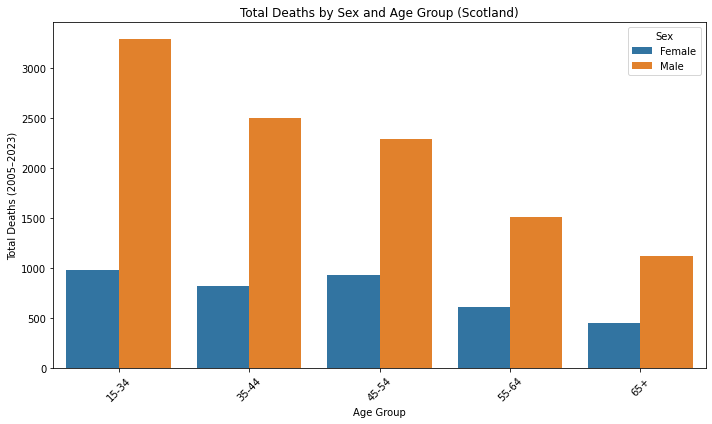

In [80]:
# Total Sucides occured in Scotland by Sex and Age Group

# Group data
grouped = df_scotland.groupby(['Sex', 'Age Group'])['Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Deaths', hue='Sex')
plt.title('Total Deaths by Sex and Age Group (Scotland)')
plt.ylabel('Total Deaths (2005–2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

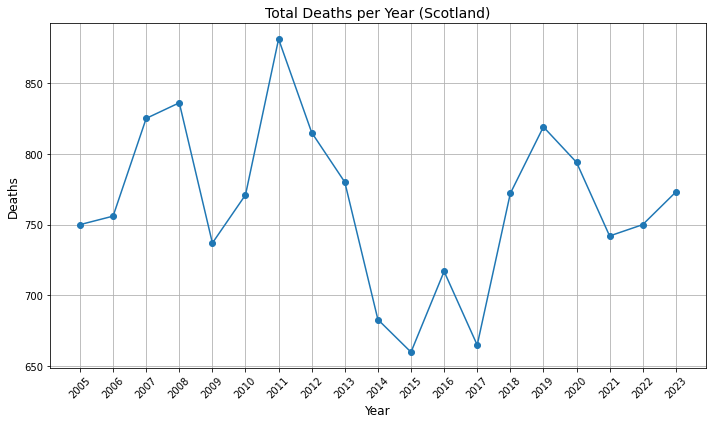

In [81]:
# Total Sucides in Scotland per year

yearly_deaths = df_scotland.groupby('Year')['Deaths'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', linestyle='-')
plt.title('Total Deaths per Year (Scotland)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.xticks(yearly_deaths.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

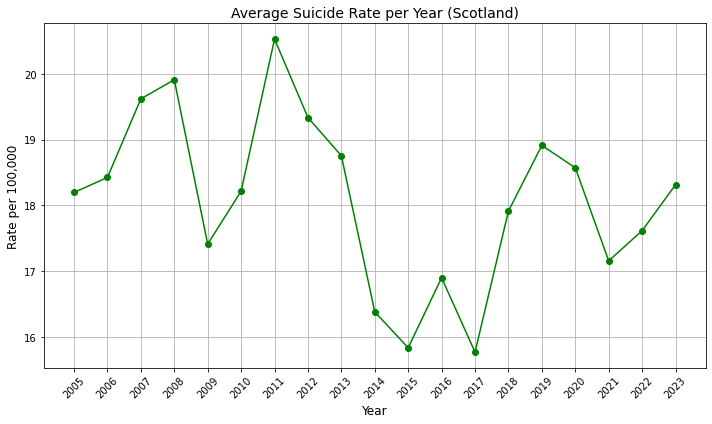

In [82]:
# Average Suicide rate in Scotland per year

yearly_rate = df_scotland.groupby('Year')['Rate (per 100,000)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_rate.index, yearly_rate.values, marker='o', linestyle='-', color='green')
plt.title('Average Suicide Rate per Year (Scotland)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 100,000', fontsize=12)
plt.xticks(yearly_rate.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

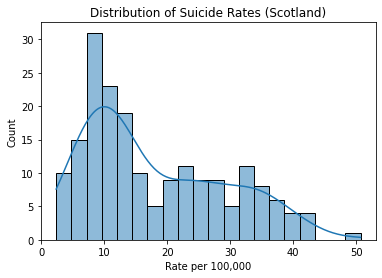

In [83]:
# Distribution of death rates in Scotland

sns.histplot(df_scotland['Rate (per 100,000)'], kde=True, bins=20)
plt.title('Distribution of Suicide Rates (Scotland)')
plt.xlabel('Rate per 100,000')
plt.show()

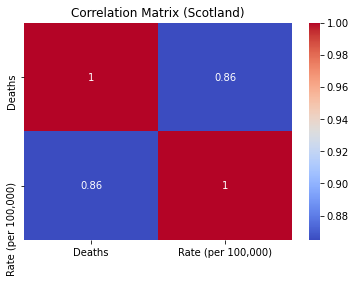

In [84]:
# Correlation between Deaths and Rate in Scotland

numeric_df = df_scotland[['Deaths', 'Rate (per 100,000)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Scotland)')
plt.show()

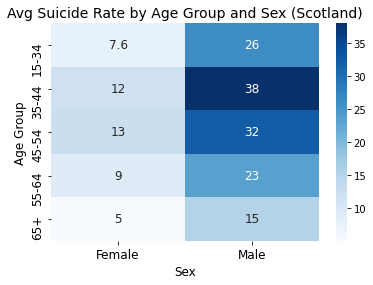

In [85]:
# Average Suicide rate in Scotland by Age Group and Sex

pivot_sex_age = df_scotland.pivot_table(index='Age Group', columns='Sex', values='Rate (per 100,000)', aggfunc='mean')
sns.heatmap(pivot_sex_age, annot=True, cmap='Blues', annot_kws={"size": 12})
plt.title('Avg Suicide Rate by Age Group and Sex (Scotland)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.show()

### Northern Ireland

#### Load  Data Northern Ireland

In [86]:
# Define file path
northern_ireland_file_path = "VS1130 Suicide and accidental deaths 2005 to 2023 - for web.xlsx"

In [87]:
# Load Northern Ireland data from Table 1.1 (starting at row 3 due to headers)
df_northern_ireland_raw = pd.read_excel(northern_ireland_file_path, sheet_name="Table 1.1", header=2)
df_northern_ireland_raw.head()  

,Registration Year,HSCT [Note 3],Sex,All Ages,Age 0-14,Age 15-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,2005,Northern Ireland,Male,167,2,66,39,31,18,11
1,2005,Northern Ireland,Female,46,0,11,6,9,13,7
2,2005,Belfast,Male,39,0,16,11,7,0,5
3,2005,Belfast,Female,13,0,2,2,3,5,1
4,2005,Northern,Male,40,2,12,8,4,9,5


#### Data Cleaning & Transformation - Northern Ireland

In [88]:
# Filter for total Northern Ireland rows only
# The dataset includes rows for each Health and Social Care Trust (HSCT) as well as a total row for "Northern Ireland"
# We retain only the total/national-level data for consistency with other UK nations
df_northern_ireland_raw = df_northern_ireland_raw[df_northern_ireland_raw["HSCT  [Note 3]"] == "Northern Ireland"]

In [89]:
# Define the relevant columns to retain:
# - Registration Year: Year in which deaths were registered
# - Sex: Male or Female
# - Age groups: Consolidated bands from 15 to 65+
columns_to_keep = [
    "Registration Year", "Sex", "Age 15-34", "Age 35-44",
    "Age 45-54", "Age 55-64", "Age 65+"
]
df_northern_ireland_raw = df_northern_ireland_raw[columns_to_keep]

In [90]:
# Prepare data for Northern Ireland by converting to long format, filtering, and renaming.

In [91]:
# Transforms the DataFrame from wide to long format:
# - Keeps 'Registration Year' and 'Sex' as identifier variables
# - Unpivots age-specific death counts into a single 'Age Group' column
# - Suicide counts are stored in a new 'Deaths' column
df_northern_ireland_long = pd.melt(
    df_northern_ireland_raw,
    id_vars=["Registration Year", "Sex"],
    var_name="Age Group",
    value_name="Deaths"
)

In [92]:
# Rename 'Registration Year' to 'Year' for consistency across UK dataset
df_northern_ireland_long = df_northern_ireland_long.rename(columns={"Registration Year": "Year"})
# Add a new 'Nation' column to label all records as 'Northern Ireland'
df_northern_ireland_long["Nation"] = "Northern Ireland"

#### Consolidate Age Bands and Finalize Dataset - Northern Ireland

In [93]:
# Define a mapping to clean age group labels by removing the 'Age ' prefix
age_group_mapping = {
    "Age 15-34": "15-34",
    "Age 35-44": "35-44",
    "Age 45-54": "45-54",
    "Age 55-64": "55-64",
    "Age 65+": "65+"
}
# Apply the mapping to standardize 'Age Group' values
df_northern_ireland_long["Age Group"] = df_northern_ireland_long["Age Group"].map(age_group_mapping)

In [94]:
# Reorder and select final columns for consistency and merging with other UK nations
df_northern_ireland_data = df_northern_ireland_long[["Nation", "Sex", "Year", "Age Group", "Deaths"]]
# Sort the data chronologically and demographically for clean output and downstream modeling
df_northern_ireland_data = df_northern_ireland_long.sort_values(by=["Year", "Sex", "Age Group"]).reset_index(drop=True)

In [95]:
# Display the cleaned and transformed dataset
df_northern_ireland_data

,Year,Sex,Age Group,Deaths,Nation
0,2005,Female,15-34,11,Northern Ireland
1,2005,Female,35-44,6,Northern Ireland
2,2005,Female,45-54,9,Northern Ireland
3,2005,Female,55-64,13,Northern Ireland
4,2005,Female,65+,7,Northern Ireland
...,...,...,...,...,...
185,2023,Male,15-34,59,Northern Ireland
186,2023,Male,35-44,31,Northern Ireland
187,2023,Male,45-54,36,Northern Ireland
188,2023,Male,55-64,27,Northern Ireland


#### Load Population Data Northern Ireland

In [96]:
# Define the file path to the Northern Ireland mid-year population estimates (NISRA data)
northern_ireland_population_file_path = "MYE23_AGE_BANDS_NI_LGD.xlsx"

In [97]:
# Load the population data from the specified Excel file
# - Sheet: "Tabular (Age_5)" contains population by 5-year age bands
# - Header row is at index 15
df_population_raw = pd.read_excel(northern_ireland_population_file_path, sheet_name="Tabular (Age_5)", header=15)
df_population_raw.head(10)

C:\Users\Balkrishna Chaugule\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


,area_code,area_name,sex,age_5,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,N92000002,NORTHERN IRELAND,All persons,00-04,157778,154565,149897,145993,141436,136884,...,125137,124548,123778,121936,120569,119070,116140,113032,111932,109906
1,N92000002,NORTHERN IRELAND,All persons,05-09,159698,159927,158422,156059,152668,149829,...,121288,123774,126248,127777,127409,126678,125694,124536,123658,122927
2,N92000002,NORTHERN IRELAND,All persons,10-14,139137,141804,144765,149400,153429,155799,...,112125,112434,113665,116148,119763,122777,124750,127130,129289,129386
3,N92000002,NORTHERN IRELAND,All persons,15-19,125800,123648,121720,122628,126376,130949,...,122426,120915,118772,115556,113854,112828,113097,113778,116164,120620
4,N92000002,NORTHERN IRELAND,All persons,20-24,120921,118443,114822,112651,110384,111891,...,120557,119494,118034,116848,116736,116369,112973,110306,105404,103031
5,N92000002,NORTHERN IRELAND,All persons,25-29,101500,104548,104443,104138,103504,103214,...,124540,124193,123264,122204,120589,119987,117550,115941,115230,116135
6,N92000002,NORTHERN IRELAND,All persons,30-34,87768,88413,90359,91855,92919,94457,...,124404,124615,125089,125853,126934,127165,126279,125431,124789,124096
7,N92000002,NORTHERN IRELAND,All persons,35-39,81937,82932,83121,84004,84409,83983,...,116048,118406,120914,123419,125749,126957,126476,127629,128826,129922
8,N92000002,NORTHERN IRELAND,All persons,40-44,82659,81627,80954,80136,79176,78659,...,125978,123576,120683,118262,116738,117620,120530,122541,125131,127481
9,N92000002,NORTHERN IRELAND,All persons,45-49,84096,82820,81180,80215,79794,79108,...,133099,131907,131157,129956,128481,126609,123754,120938,118428,116981


In [98]:
# Filter the dataset to include only rows where area_name is "NORTHERN IRELAND"
# This removes rows for individual LGDs (local government districts)
df_population = df_population_raw[df_population_raw["area_name"] == "NORTHERN IRELAND"]

In [99]:
# Select required columns: sex, 5-year age groups, and population counts for years 2005–2023
years = list(range(2005, 2024))
df_population = df_population[["sex", "age_5"] + years]

In [100]:
# Convert the DataFrame from wide to long format:
# - Each row will now represent a unique (Sex, Age Group, Year) combination
df_long = df_population.melt(id_vars=["sex", "age_5"], var_name="Year", value_name="Population")

# Rename columns for consistency
df_long.rename(columns={"sex": "Sex", "age_5": "Age Group"}, inplace=True)

#### Consolidate Age Bands and Finalize Population Dataset - Northern Ireland

In [101]:
# Define a mapping from 5-year age bands to broader custom age groups matching the suicide dataset
age_band_map = {
    "15-19": "15-34", "20-24": "15-34", "25-29": "15-34", "30-34": "15-34",
    "35-39": "35-44", "40-44": "35-44",
    "45-49": "45-54", "50-54": "45-54",
    "55-59": "55-64", "60-64": "55-64",
    "65-69": "65+", "70-74": "65+", "75-79": "65+", "80-84": "65+", "85-89": "65+", "90+": "65+"
}

In [102]:
# Map the original 5-year age bands to the broader custom age groups
df_long["Age Group"] = df_long["Age Group"].map(age_band_map)

In [103]:
# Drop rows with age groups not in mapping (e.g., total rows or unexpected ones)
df_long = df_long.dropna(subset=["Age Group"])

In [104]:
# Group by Sex, Year, Broad Age Group and sum population
df_population_grouped = df_long.groupby(["Year", "Sex", "Age Group"], as_index=False).agg({"Population": "sum"})

In [105]:
# Display the aggregated population data by Year, Sex, and Age Group
df_population_grouped

,Year,Sex,Age Group,Population
0,2005,All persons,15-34,485540
1,2005,All persons,35-44,260341
2,2005,All persons,45-54,214229
3,2005,All persons,55-64,179975
4,2005,All persons,65+,234905
...,...,...,...,...
280,2023,Males,15-34,235277
281,2023,Males,35-44,124254
282,2023,Males,45-54,119704
283,2023,Males,55-64,122304


In [106]:
# Ensure 'Year', 'Sex', and 'Age Group' columns are string-typed and whitespace-free in both datasets
# This prevents merge issues caused by formatting inconsistencies
for col in ["Year", "Sex", "Age Group"]:
    df_northern_ireland_data[col] = df_northern_ireland_data[col].astype(str).str.strip()
    df_population_grouped[col] = df_population_grouped[col].astype(str).str.strip()

In [107]:
# Check that age groups and sex labels match exactly between deaths and population data
print("Deaths Age Groups:", sorted(df_northern_ireland_data["Age Group"].unique()))
print("Population Age Groups:", sorted(df_population_grouped["Age Group"].unique()))

print("Deaths Sex:", df_northern_ireland_data["Sex"].unique())
print("Population Sex:", df_population_grouped["Sex"].unique())

Deaths Age Groups: ['15-34', '35-44', '45-54', '55-64', '65+']
Population Age Groups: ['15-34', '35-44', '45-54', '55-64', '65+']
Deaths Sex: ['Female' 'Male']
Population Sex: ['All persons' 'Females' 'Males']


In [108]:
# Filter out rows where 'Sex' is "All persons" from the population data
# These rows represent totals across both sexes and are not used for sex-specific rate calculations
df_population_grouped = df_population_grouped[df_population_grouped["Sex"] != "All persons"].copy()

# Standardize the sex labels to match the format used in the death data
df_population_grouped["Sex"] = df_population_grouped["Sex"].replace({
    "Males": "Male",
    "Females": "Female"
})

In [109]:
# Output the number of rows in the cleaned population dataset
df_population_grouped.shape[0]

190

In [110]:
# Merge the deaths and population data on common keys: Year, Sex, and Age Group
# 'inner' join ensures that only matching records are kept (i.e., no nulls)
df_northern_ireland = pd.merge(
    df_northern_ireland_data,
    df_population_grouped,
    on=["Year", "Sex", "Age Group"],
    how="inner"
)

In [111]:
# Display the merged DataFrame (includes Nation, Year, Sex, Age Group, Deaths, and Population)
df_northern_ireland

,Year,Sex,Age Group,Deaths,Nation,Population
0,2005,Female,15-34,11,Northern Ireland,242361
1,2005,Female,35-44,6,Northern Ireland,132141
2,2005,Female,45-54,9,Northern Ireland,107600
3,2005,Female,55-64,13,Northern Ireland,92031
4,2005,Female,65+,7,Northern Ireland,136487
...,...,...,...,...,...,...
185,2023,Male,15-34,59,Northern Ireland,235277
186,2023,Male,35-44,31,Northern Ireland,124254
187,2023,Male,45-54,36,Northern Ireland,119704
188,2023,Male,55-64,27,Northern Ireland,122304


In [112]:
# Calculate the suicide rate per 100,000 population
# Formula: (Deaths / Population) * 100,000
df_northern_ireland["Rate (per 100,000)"] = (df_northern_ireland["Deaths"] / df_northern_ireland["Population"]) * 100000

df_northern_ireland["Rate (per 100,000)"] = df_northern_ireland["Rate (per 100,000)"].round(2)

In [113]:
# Display the dataset with suicide rates
df_northern_ireland

,Year,Sex,Age Group,Deaths,Nation,Population,"Rate (per 100,000)"
0,2005,Female,15-34,11,Northern Ireland,242361,4.54
1,2005,Female,35-44,6,Northern Ireland,132141,4.54
2,2005,Female,45-54,9,Northern Ireland,107600,8.36
3,2005,Female,55-64,13,Northern Ireland,92031,14.13
4,2005,Female,65+,7,Northern Ireland,136487,5.13
...,...,...,...,...,...,...,...
185,2023,Male,15-34,59,Northern Ireland,235277,25.08
186,2023,Male,35-44,31,Northern Ireland,124254,24.95
187,2023,Male,45-54,36,Northern Ireland,119704,30.07
188,2023,Male,55-64,27,Northern Ireland,122304,22.08


In [114]:
# Drop the 'Population' column as it's no longer needed after calculating rates
df_northern_ireland = df_northern_ireland.drop(columns=["Population"])

In [115]:
# Final cleaned and rate-calculated dataset for Northern Ireland
df_northern_ireland

,Year,Sex,Age Group,Deaths,Nation,"Rate (per 100,000)"
0,2005,Female,15-34,11,Northern Ireland,4.54
1,2005,Female,35-44,6,Northern Ireland,4.54
2,2005,Female,45-54,9,Northern Ireland,8.36
3,2005,Female,55-64,13,Northern Ireland,14.13
4,2005,Female,65+,7,Northern Ireland,5.13
...,...,...,...,...,...,...
185,2023,Male,15-34,59,Northern Ireland,25.08
186,2023,Male,35-44,31,Northern Ireland,24.95
187,2023,Male,45-54,36,Northern Ireland,30.07
188,2023,Male,55-64,27,Northern Ireland,22.08


In [116]:
# Reorder the columns for consistency and readability
df_northern_ireland = df_northern_ireland[
    ["Nation", "Year", "Sex", "Age Group", "Deaths", "Rate (per 100,000)"]
]

In [117]:
# Display the final cleaned DataFrame
df_northern_ireland

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
0,Northern Ireland,2005,Female,15-34,11,4.54
1,Northern Ireland,2005,Female,35-44,6,4.54
2,Northern Ireland,2005,Female,45-54,9,8.36
3,Northern Ireland,2005,Female,55-64,13,14.13
4,Northern Ireland,2005,Female,65+,7,5.13
...,...,...,...,...,...,...
185,Northern Ireland,2023,Male,15-34,59,25.08
186,Northern Ireland,2023,Male,35-44,31,24.95
187,Northern Ireland,2023,Male,45-54,36,30.07
188,Northern Ireland,2023,Male,55-64,27,22.08


In [118]:
# Check data types before fixing
print(df_northern_ireland.dtypes)

Nation                 object
Year                   object
Sex                    object
Age Group              object
Deaths                  int64
Rate (per 100,000)    float64
dtype: object


In [119]:
# Convert 'Year' column to integer for proper numerical operations or plotting
df_northern_ireland["Year"] = df_northern_ireland["Year"].astype(np.int64)

In [120]:
# Confirm data types after conversion
print(df_northern_ireland.dtypes)

Nation                 object
Year                    int64
Sex                    object
Age Group              object
Deaths                  int64
Rate (per 100,000)    float64
dtype: object


In [121]:
# Output the total number of rows 
df_northern_ireland.shape

(190, 6)

#### Export Processed Data - Northern Ireland

In [122]:
# Export the cleaned and finalized Northern Ireland dataset to CSV
df_northern_ireland.to_csv("Northern_Ireland_cleaned.csv", index=False)

In [123]:
# Display summary statistics for numeric columns (Deaths, Rate)
print(df_northern_ireland.describe())

              Year      Deaths  Rate (per 100,000)
count   190.000000  190.000000          190.000000
mean   2014.000000   24.378947           16.530737
std       5.491696   20.494510           11.209937
min    2005.000000    2.000000            1.090000
25%    2009.000000   11.000000            7.572500
50%    2014.000000   18.000000           12.900000
75%    2019.000000   33.500000           25.040000
max    2023.000000  104.000000           42.700000


#### Visualization - Northern Ireland

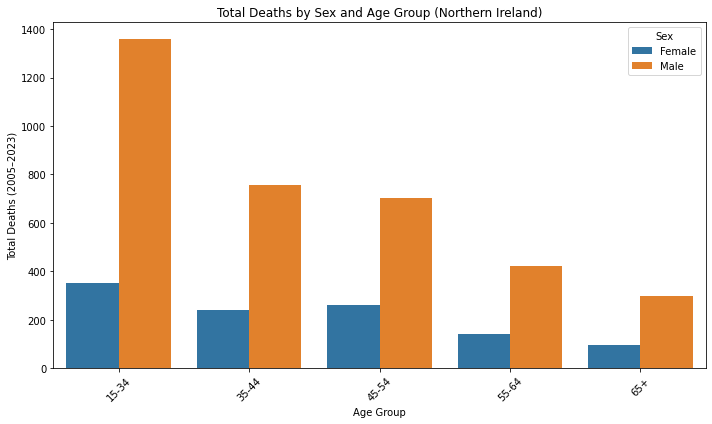

In [124]:
# Total Sucides occured in Northern Ireland by Sex and Age Group

# Group data
grouped = df_northern_ireland.groupby(['Sex', 'Age Group'])['Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Age Group', y='Deaths', hue='Sex')
plt.title('Total Deaths by Sex and Age Group (Northern Ireland)')
plt.ylabel('Total Deaths (2005–2023)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

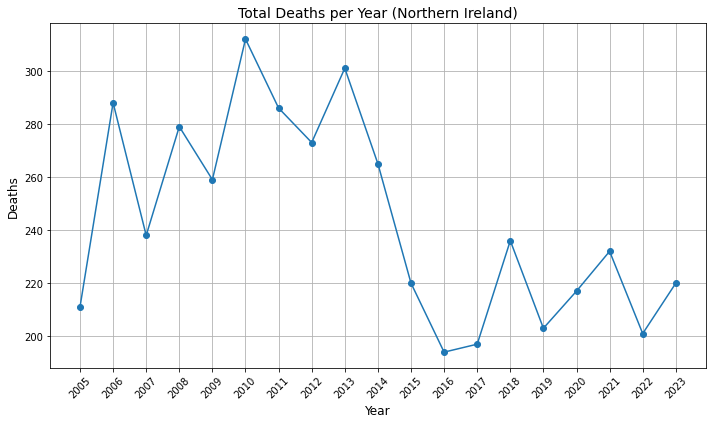

In [125]:
# Total Sucides in Northern Ireland per year

yearly_deaths = df_northern_ireland.groupby('Year')['Deaths'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', linestyle='-')
plt.title('Total Deaths per Year (Northern Ireland)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.xticks(yearly_deaths.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

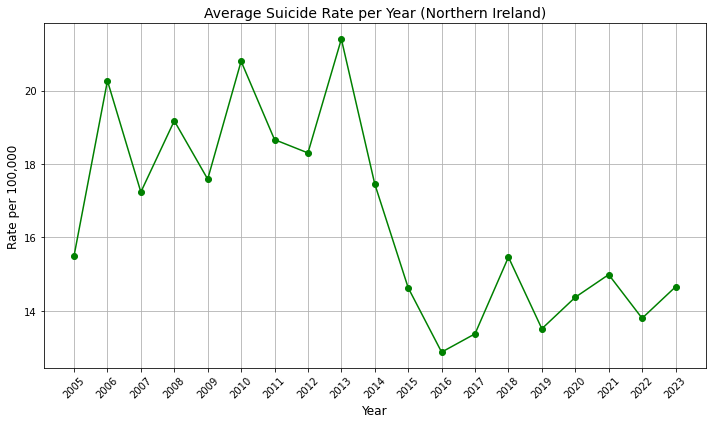

In [126]:
# Average Suicide rate in Northern Ireland per year

yearly_rate = df_northern_ireland.groupby('Year')['Rate (per 100,000)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_rate.index, yearly_rate.values, marker='o', linestyle='-', color='green')
plt.title('Average Suicide Rate per Year (Northern Ireland)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 100,000', fontsize=12)
plt.xticks(yearly_rate.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

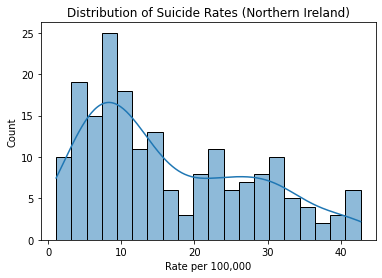

In [127]:
# Distribution of death rates in Northern Ireland

sns.histplot(df_northern_ireland['Rate (per 100,000)'], kde=True, bins=20)
plt.title('Distribution of Suicide Rates (Northern Ireland)')
plt.xlabel('Rate per 100,000')
plt.show()

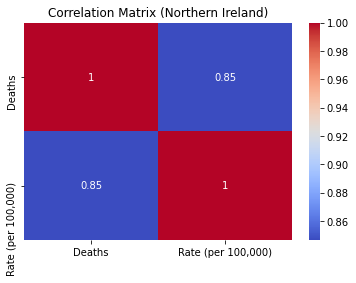

In [128]:
# Correlation between Deaths and Rate in Northern Ireland

numeric_df = df_northern_ireland[['Deaths', 'Rate (per 100,000)']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Northern Ireland)')
plt.show()

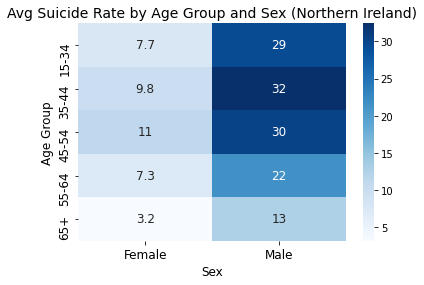

In [129]:
# Average Suicide rate in Northern Ireland by Age Group and Sex

pivot_sex_age = df_northern_ireland.pivot_table(index='Age Group', columns='Sex', values='Rate (per 100,000)', aggfunc='mean')
sns.heatmap(pivot_sex_age, annot=True, cmap='Blues', annot_kws={"size": 12})
plt.title('Avg Suicide Rate by Age Group and Sex (Northern Ireland)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.show()

### UK Nations

#### Merge All Four UK Nations

In [130]:
# Concatenate cleaned suicide datasets from all four UK nations into a single DataFrame
df_uk_suicide = pd.concat(
    [df_england, df_wales, df_scotland, df_northern_ireland],
    axis=0,
    ignore_index=True
)

In [131]:
# Display the full UK-wide suicide dataset
df_uk_suicide

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
0,England,2005,Female,15-34,270,4.05
1,England,2005,Female,35-44,245,6.30
2,England,2005,Female,45-54,241,7.50
3,England,2005,Female,55-64,178,5.95
4,England,2005,Female,65+,223,5.37
...,...,...,...,...,...,...
755,Northern Ireland,2023,Male,15-34,59,25.08
756,Northern Ireland,2023,Male,35-44,31,24.95
757,Northern Ireland,2023,Male,45-54,36,30.07
758,Northern Ireland,2023,Male,55-64,27,22.08


#### Export Processed Data - UK Sucide

In [132]:
# Export the merged dataset to a CSV file for analysis or modeling
df_uk_suicide.to_csv("UK_Suicide_cleaned.csv", index=False)

### EDA - UK Sucide

In [133]:
# Generate summary statistics for all columns
df_uk_suicide.describe(include='all')

,Nation,Year,Sex,Age Group,Deaths,"Rate (per 100,000)"
count,760,760.000000,760,760,760.000000,760.000000
unique,4,NaN,2,5,NaN,NaN
top,England,NaN,Female,15-34,NaN,NaN
freq,190,NaN,380,152,NaN,NaN
mean,NaN,2014.000000,NaN,NaN,150.361842,15.022539
std,NaN,5.480833,NaN,NaN,232.117143,9.896681
min,NaN,2005.000000,NaN,NaN,2.000000,1.090000
25%,NaN,2009.000000,NaN,NaN,18.000000,6.700000
50%,NaN,2014.000000,NaN,NaN,48.500000,12.790000
75%,NaN,2019.000000,NaN,NaN,178.500000,21.580000


#### Visualization - UK Sucide

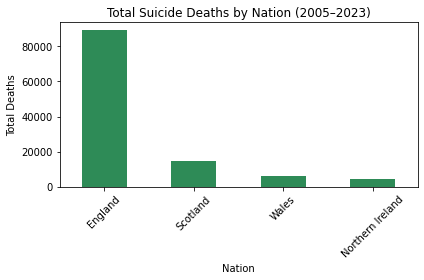

In [134]:
# Total Suicide Deaths by Nation (2005–2023)

# Group by Nation and sum total deaths, then sort for comparison
nation_totals = df_uk_suicide.groupby("Nation")["Deaths"].sum().sort_values(ascending=False)
nation_totals.plot(kind='bar', title="Total Suicide Deaths by Nation (2005–2023)", ylabel="Total Deaths", color="seagreen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

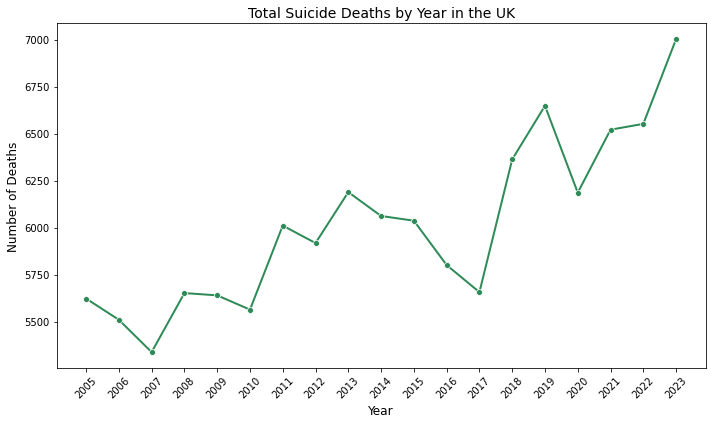

In [135]:
# Total Suicide Deaths by Year in the UK

# Aggregate deaths by year for the entire UK
deaths_by_year = df_uk_suicide.groupby("Year")["Deaths"].sum().reset_index()

# Create line plot to show trends in total suicide deaths over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=deaths_by_year, x="Year", y="Deaths", marker="o", linewidth=2, color="seagreen")

plt.title("Total Suicide Deaths by Year in the UK", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(sorted(deaths_by_year["Year"].unique()), rotation=45)

plt.tight_layout()
plt.show()

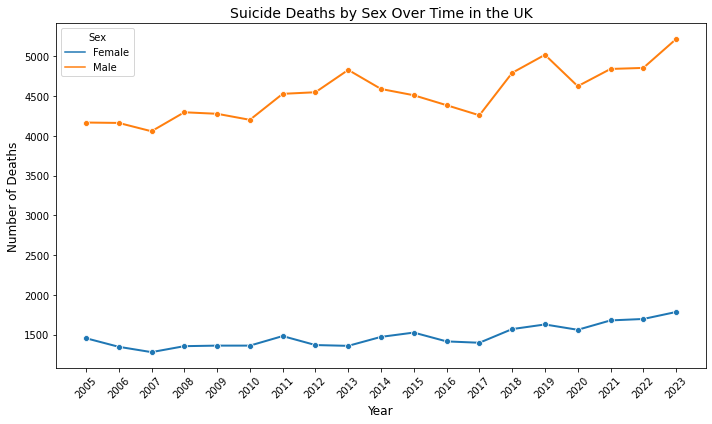

In [136]:
# Suicide Deaths by Sex Over Time in the UK

# Group by Year and Sex to observe trends across genders
deaths_by_sex = df_uk_suicide.groupby(["Year", "Sex"])["Deaths"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=deaths_by_sex, x="Year", y="Deaths", hue="Sex", marker="o", linewidth=2)
plt.title("Suicide Deaths by Sex Over Time in the UK", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(sorted(deaths_by_year["Year"].unique()), rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

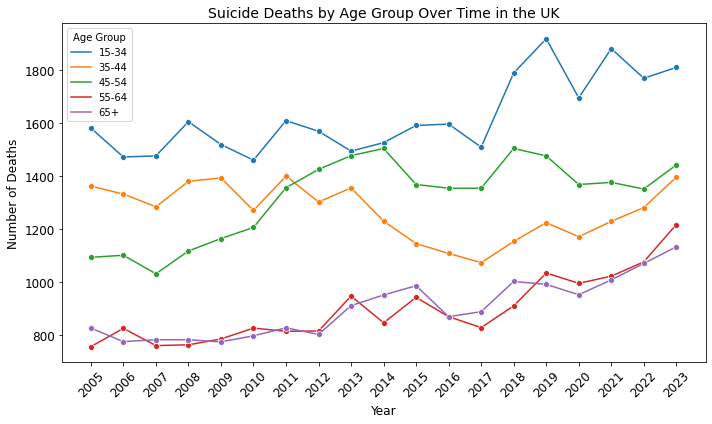

In [137]:
# Suicide Deaths by Age Group Over Time in the UK

# Group by Year and Age Group to analyze trends across age bands
deaths_by_age = df_uk_suicide.groupby(["Year", "Age Group"])["Deaths"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=deaths_by_age, x="Year", y="Deaths", hue="Age Group", marker="o")

plt.title("Suicide Deaths by Age Group Over Time in the UK", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(sorted(deaths_by_year["Year"].unique()), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

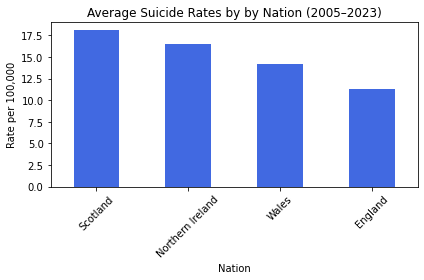

In [138]:
# Average Suicide Rates by by Nation (2005–2023)

# Group by Nation and sum total deaths, then sort for comparison
nation_totals = df_uk_suicide.groupby("Nation")["Rate (per 100,000)"].mean().sort_values(ascending=False)
nation_totals.plot(kind='bar', title="Average Suicide Rates by by Nation (2005–2023)", ylabel="Rate per 100,000", color="royalblue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

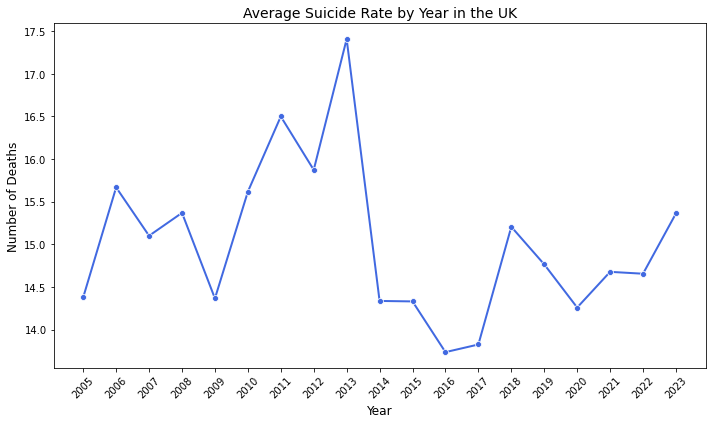

In [139]:
# Average Suicide Rate by Year in the UK

# Aggregate Suicide Rate by year for the entire UK
deaths_by_year = df_uk_suicide.groupby("Year")["Rate (per 100,000)"].mean().reset_index()

# Create line plot to show trends in total suicide deaths over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=deaths_by_year, x="Year", y="Rate (per 100,000)", marker="o", linewidth=2, color="royalblue")

plt.title("Average Suicide Rate by Year in the UK", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(sorted(deaths_by_year["Year"].unique()), rotation=45)

plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022'),
  Text(18, 0, '2023')])

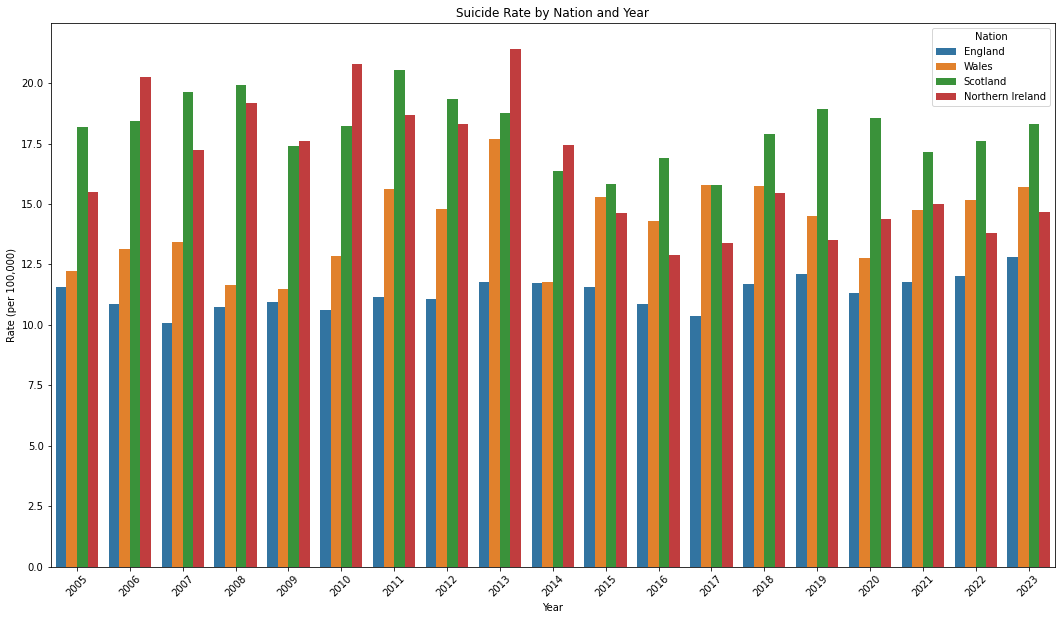

In [140]:
# Suicide Rate by Nation and Year

plt.figure(figsize=(18, 10))
sns.barplot(data=df_uk_suicide, x="Year", y="Rate (per 100,000)", hue="Nation", ci=None)
plt.title("Suicide Rate by Nation and Year")
plt.xticks(rotation=45)

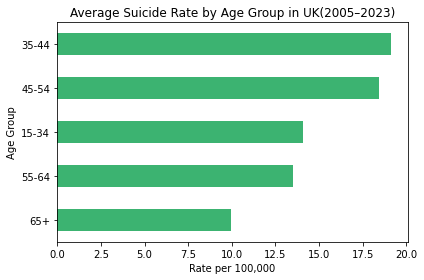

In [141]:
# Average Suicide Rates by Age Group

# Compute the average suicide rate per age group across all years and nations
agegroup_avg_rate = df_uk_suicide.groupby("Age Group")["Rate (per 100,000)"].mean().sort_values()

agegroup_avg_rate.plot(kind="barh", title="Average Suicide Rate by Age Group in UK(2005–2023)", color="mediumseagreen")
plt.xlabel("Rate per 100,000")
plt.tight_layout()
plt.show()

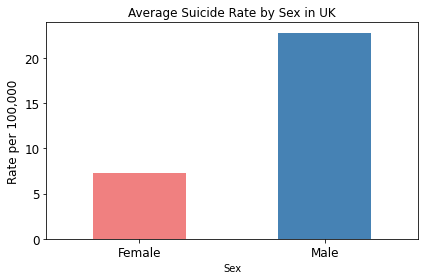

In [142]:
# Average Suicide Rate by Sex

# Calculate average rate by sex
sex_rate = df_uk_suicide.groupby("Sex")["Rate (per 100,000)"].mean()
sex_rate.plot(kind="bar", title="Average Suicide Rate by Sex in UK", color=["lightcoral", "steelblue"])
plt.ylabel("Rate per 100,000", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [143]:
# Highest Suicide Rate Year by Nation

# Group by Nation and Year, compute average rate per 100,000
highest_years = df_uk_suicide.groupby(["Nation", "Year"])["Rate (per 100,000)"].mean().reset_index()
# Find the year with the highest suicide rate for each nation
max_by_nation = highest_years.loc[highest_years.groupby("Nation")["Rate (per 100,000)"].idxmax()]

print(max_by_nation)

              Nation  Year  Rate (per 100,000)
18           England  2023              12.792
27  Northern Ireland  2013              21.407
44          Scotland  2011              20.529
65             Wales  2013              17.706


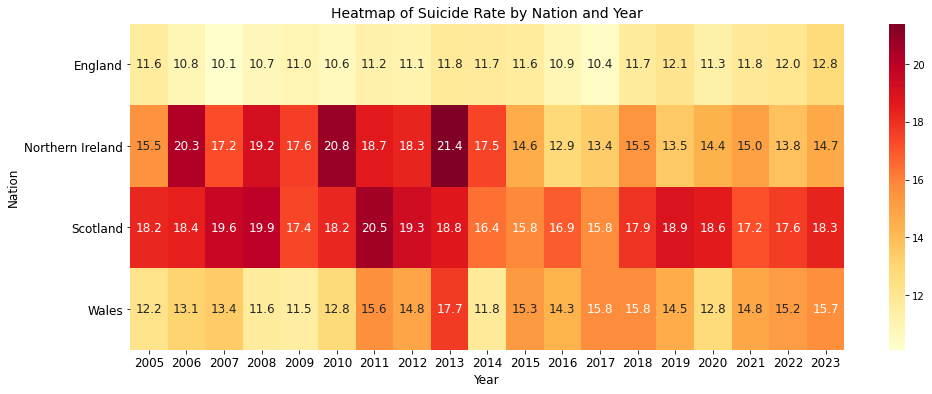

In [144]:
# Heatmap of Suicide Rate by Nation and Year

# Pivot the dataset to create a matrix of Nation (rows) x Year (columns)
heat_df = df_uk_suicide.groupby(["Nation", "Year"])["Rate (per 100,000)"].mean().unstack()

plt.figure(figsize=(16, 6))
heat_df = df_uk_suicide.groupby(["Nation", "Year"])["Rate (per 100,000)"].mean().unstack()
sns.heatmap(heat_df, cmap="YlOrRd", annot=True, fmt=".1f", annot_kws={"size": 12})
plt.title("Heatmap of Suicide Rate by Nation and Year", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.xlabel("Year", fontsize=12)
plt.ylabel("Nation", fontsize=12)
plt.show()

## Modeling

#### Comparative Forecasting of Suicide Rates Across UK Nations Using ARIMA, Prophet, and LSTM

 ARIMA Model Evaluation (Nation-Level)


Processing Nation: England
Best ARIMA Order for England: (0, 0, 1)


C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


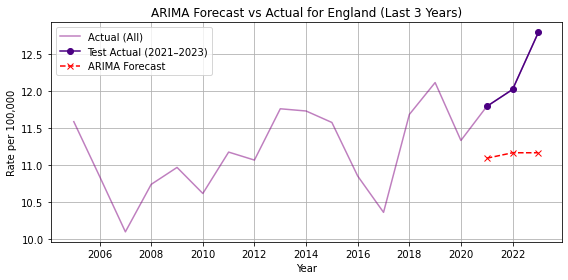


Processing Nation: Wales
Best ARIMA Order for Wales: (0, 0, 0)


C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


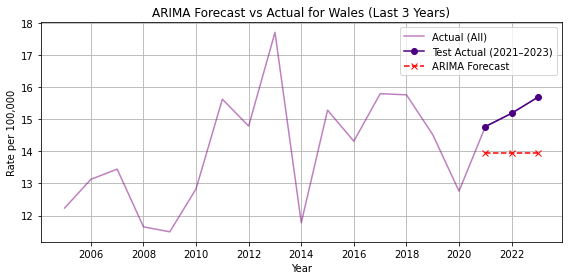


Processing Nation: Scotland
Best ARIMA Order for Scotland: (1, 0, 1)


C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


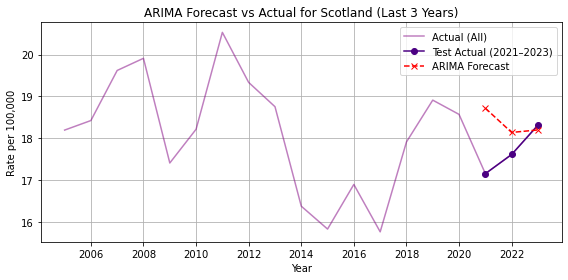


Processing Nation: Northern Ireland
Best ARIMA Order for Northern Ireland: (1, 0, 0)


C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


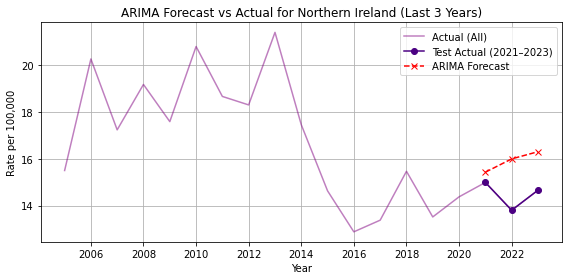


ARIMA Model Evaluation Results:


,Nation,ARIMA_Order,RMSE,MAE,Forecast,Actual
0,England,"(0, 0, 1)",1.135,1.060,"[11.092007787504395, 11.166010722523657, 11.16...","[11.792, 12.021, 12.792]"
1,Wales,"(0, 0, 0)",1.325,1.270,"[13.944182325503329, 13.944182325503329, 13.94...","[14.771, 15.185999999999998, 15.687000000000001]"
2,Scotland,"(1, 0, 1)",0.954,0.734,"[18.71849789964871, 18.14082779675935, 18.2009...","[17.157, 17.615, 18.315]"
3,Northern Ireland,"(1, 0, 0)",1.605,1.427,"[15.426496461248512, 15.99575508967732, 16.302...","[14.988999999999999, 13.799000000000001, 14.65..."


In [145]:
# Load dataset
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Results container
arima_results = []

# Loop over nations
nations = df['Nation'].unique()

for nation in nations:
    print(f"\nProcessing Nation: {nation}")
    
    # Prepare data
    df_nation = df[df['Nation'] == nation]
    df_yearly = df_nation.groupby('Year')['Rate (per 100,000)'].mean().reset_index()
    df_yearly['Year'] = pd.to_datetime(df_yearly['Year'], format='%Y')
    df_yearly.set_index('Year', inplace=True)

    # Train-test split
    train = df_yearly.iloc[:-3]
    test = df_yearly.iloc[-3:]

    # Fit Auto ARIMA
    stepwise_model = auto_arima(train, seasonal=False, suppress_warnings=True)
    print(f"Best ARIMA Order for {nation}: {stepwise_model.order}")

    model = ARIMA(train, order=stepwise_model.order)
    model_fit = model.fit()

    # Forecast 3 years
    forecast = model_fit.forecast(steps=3)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    
    # Combine full actuals and forecast for clearer plot
    comparison_df = test.copy()
    comparison_df['Forecast'] = forecast.values
    
    # Plot comparison: Forecast vs Actual
    plt.figure(figsize=(8, 4))
    
    # Plot entire actual time series (train + test)
    plt.plot(df_yearly.index, df_yearly['Rate (per 100,000)'], label='Actual (All)', color='purple', alpha=0.5)
    
    # Highlight test actuals (2021–2023)
    plt.plot(comparison_df.index, comparison_df['Rate (per 100,000)'], label='Test Actual (2021–2023)', color='indigo', marker='o')
    
    # Forecast line
    plt.plot(comparison_df.index, comparison_df['Forecast'], label='ARIMA Forecast', color='red', marker='x', linestyle='--')
    
    plt.title(f'ARIMA Forecast vs Actual for {nation} (Last 3 Years)')
    plt.ylabel('Rate per 100,000')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Store results
    arima_results.append({
        'Nation': nation,
        'ARIMA_Order': stepwise_model.order,
        'RMSE': round(rmse, 3),
        'MAE': round(mae, 3),
        'Forecast': forecast.values,
        'Actual': test['Rate (per 100,000)'].values
    })

# Display result summary
results_df = pd.DataFrame(arima_results)
print("\nARIMA Model Evaluation Results:")
display(results_df)


Prophet Model Evaluation (Nation-Level)


Processing Nation: England


INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


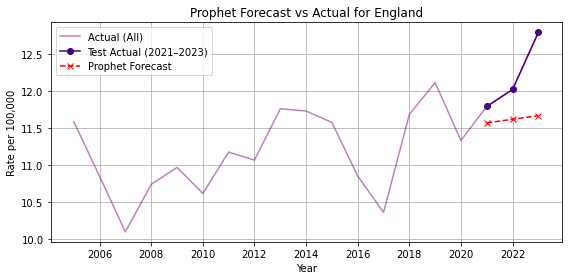

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1



Processing Nation: Wales


INFO:cmdstanpy:finish chain 1


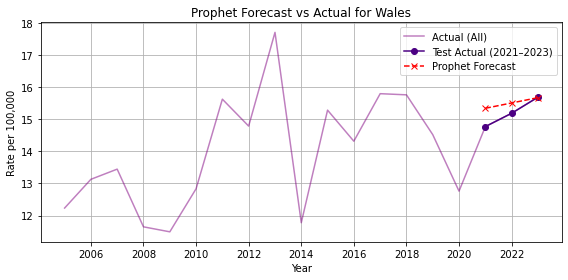

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1



Processing Nation: Scotland


INFO:cmdstanpy:finish chain 1


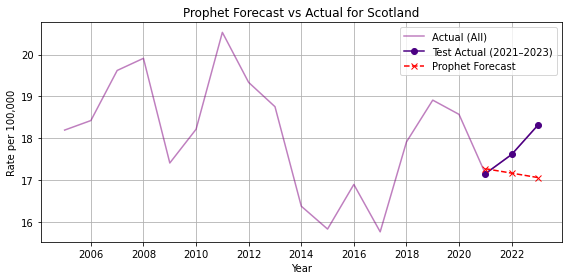

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1



Processing Nation: Northern Ireland


INFO:cmdstanpy:finish chain 1


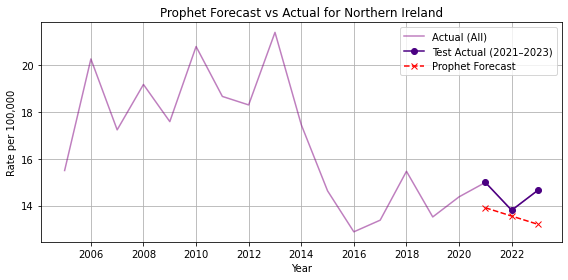


Prophet Model Evaluation Results:


,Nation,RMSE,MAE,Forecast,Actual
0,England,0.702,0.583,"[11.569693312597947, 11.618275006311679, 11.66...","[11.792, 12.021, 12.792]"
1,Wales,0.378,0.302,"[15.34149848803521, 15.50694358702074, 15.6723...","[14.771, 15.185999999999998, 15.687000000000001]"
2,Scotland,0.770,0.605,"[17.274857994660074, 17.16951066407753, 17.064...","[17.157, 17.615, 18.315]"
3,Northern Ireland,1.059,0.930,"[13.904690817700697, 13.55089138962215, 13.197...","[14.988999999999999, 13.799000000000001, 14.65..."


In [146]:
# Load dataset
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Store results
prophet_results = []

# Get unique nations
nations = df['Nation'].unique()

for nation in nations:
    print(f"\nProcessing Nation: {nation}")

    # Prepare data
    df_nation = df[df['Nation'] == nation]
    df_yearly = df_nation.groupby('Year')['Rate (per 100,000)'].mean().reset_index()
    df_yearly.columns = ['ds', 'y']  # Prophet expects these column names
    df_yearly['ds'] = pd.to_datetime(df_yearly['ds'], format='%Y')
    
    # Train-test split (last 3 years for testing)
    train = df_yearly.iloc[:-3]
    test = df_yearly.iloc[-3:]

    # Fit Prophet
    model = Prophet(growth='linear', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train)

    # Forecast next 3 years
    future = model.make_future_dataframe(periods=3, freq='YS')
    forecast = model.predict(future)

    # Extract predicted values for test years
    forecast_test = forecast[forecast['ds'].isin(test['ds'])]['yhat'].values

    # Evaluate forecast
    rmse = np.sqrt(mean_squared_error(test['y'].values, forecast_test))
    mae = mean_absolute_error(test['y'].values, forecast_test)

    # Store results
    prophet_results.append({
        'Nation': nation,
        'RMSE': round(rmse, 3),
        'MAE': round(mae, 3),
        'Forecast': forecast_test,
        'Actual': test['y'].values
    })

    # Merge test actuals with forecast predictions for plotting
    comparison_df = test.copy()
    comparison_df['Forecast'] = forecast_test

    # Plot both actual and forecasted values
    plt.figure(figsize=(8, 4))

    # Plot full actual values (train + test)
    plt.plot(df_yearly['ds'], df_yearly['y'], label='Actual (All)', color='purple', alpha=0.5)

    # Highlight test actuals
    plt.plot(comparison_df['ds'], comparison_df['y'], label='Test Actual (2021–2023)', color='indigo', marker='o')

    # Plot forecast for test years
    plt.plot(comparison_df['ds'], comparison_df['Forecast'], label='Prophet Forecast', color='red', marker='x', linestyle='--')
    
    # Format
    plt.title(f"Prophet Forecast vs Actual for {nation}")
    plt.xlabel("Year")
    plt.ylabel("Rate per 100,000")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display results
prophet_df = pd.DataFrame(prophet_results)
print("\nProphet Model Evaluation Results:")
display(prophet_df)


LSTM Model Evaluation (Nation-Level)


Processing Nation: England
1/1 [==============================] - 1s 914ms/step
LSTM RMSE: 1.054, MAE: 0.948


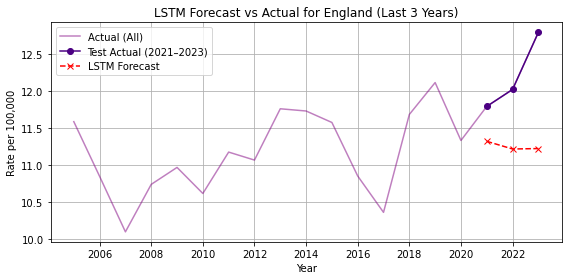


Processing Nation: Wales
1/1 [==============================] - 0s 442ms/step
LSTM RMSE: 1.146, MAE: 0.904


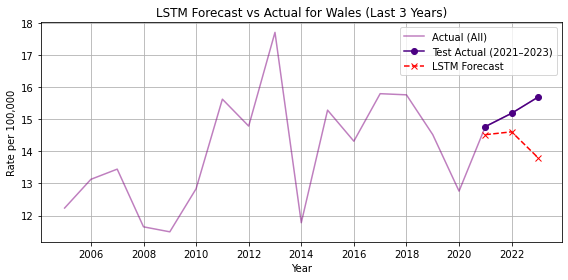


Processing Nation: Scotland
1/1 [==============================] - 1s 607ms/step
LSTM RMSE: 1.023, MAE: 0.834


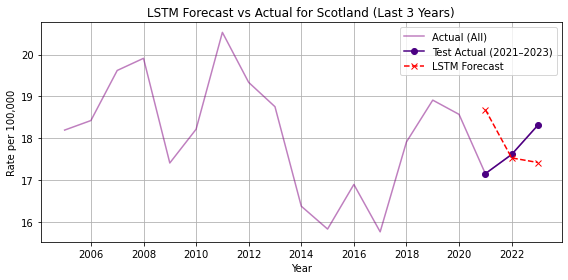


Processing Nation: Northern Ireland
1/1 [==============================] - 0s 360ms/step
LSTM RMSE: 0.586, MAE: 0.511


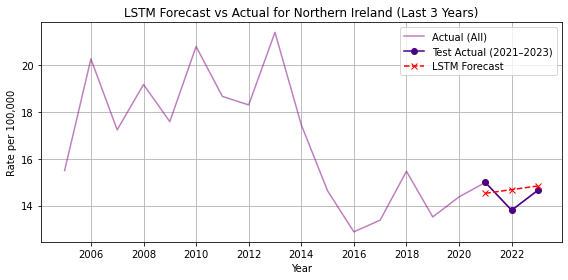


LSTM Model Evaluation Results:


,Nation,RMSE,MAE,Forecast,Actual
0,England,1.054,0.948,"[11.32049, 11.216805, 11.2227]","[11.792, 12.020999999999999, 12.792]"
1,Wales,1.146,0.904,"[14.519249, 14.607523, 13.804137]","[14.771, 15.186, 15.687000000000001]"
2,Scotland,1.023,0.834,"[18.686148, 17.533344, 17.422943]","[17.157, 17.615, 18.315]"
3,Northern Ireland,0.586,0.511,"[14.522638, 14.682247, 14.837498]","[14.988999999999999, 13.799000000000001, 14.65..."


In [147]:
# Load dataset
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Results container for LSTM
lstm_results = []

# Define sequence length (how many past years to use for prediction)
SEQ_LENGTH = 4

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

nations = df['Nation'].unique()

for nation in nations:
    print(f"\nProcessing Nation: {nation}")

    # Prepare data: yearly average rate
    df_nation = df[df['Nation'] == nation]
    df_yearly = df_nation.groupby('Year')['Rate (per 100,000)'].mean().reset_index()
    df_yearly = df_yearly.sort_values('Year')

    rates = df_yearly['Rate (per 100,000)'].values.reshape(-1, 1)

    # Normalize rates
    scaler = MinMaxScaler(feature_range=(0, 1))
    rates_scaled = scaler.fit_transform(rates)

    # Create sequences for LSTM
    X, y = create_sequences(rates_scaled, SEQ_LENGTH)

    # Split train and test (last 3 years test)
    train_size = len(rates_scaled) - 3 - SEQ_LENGTH
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input for LSTM (samples, time steps, features)
    X_train = X_train.reshape((X_train.shape[0], SEQ_LENGTH, 1))
    X_test = X_test.reshape((X_test.shape[0], SEQ_LENGTH, 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

    # Predict on test set
    y_pred_scaled = model.predict(X_test)

    # Inverse transform to original scale
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_original = scaler.inverse_transform(y_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    mae = mean_absolute_error(y_test_original, y_pred)

    print(f"LSTM RMSE: {rmse:.3f}, MAE: {mae:.3f}")

    # Store results
    lstm_results.append({
        'Nation': nation,
        'RMSE': round(rmse, 3),
        'MAE': round(mae, 3),
        'Forecast': y_pred.flatten(),
        'Actual': y_test_original.flatten()
    })

    # Create full DataFrame for plotting
    full_years = df_yearly['Year'].values
    full_rates = df_yearly['Rate (per 100,000)'].values

    # Get test years (last 3)
    test_years = full_years[-3:]

    # Plot full trend
    plt.figure(figsize=(8, 4))
    plt.plot(full_years, full_rates, label='Actual (All)', color='purple', alpha=0.5)

    # Highlight actual values in test set
    plt.plot(test_years, y_test_original.flatten(), marker='o', label='Test Actual (2021–2023)', color='indigo')
    
    # Force all x-axis ticks from 2005 to 2023
    plt.xticks(np.arange(2006, full_years.max() + 1, 2))
    
    # LSTM Predictions
    plt.plot(test_years, y_pred.flatten(), marker='x', linestyle='--', label='LSTM Forecast', color='red')

    plt.title(f"LSTM Forecast vs Actual for {nation} (Last 3 Years)")
    plt.xlabel('Year')
    plt.ylabel('Rate per 100,000')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Display LSTM results summary
lstm_df = pd.DataFrame(lstm_results)
print("\nLSTM Model Evaluation Results:")
display(lstm_df)

Combine all results

In [148]:
# Add a model identifier
arima_df = results_df.copy()
arima_df['Model'] = 'ARIMA'

prophet_df['Model'] = 'Prophet'
lstm_df['Model'] = 'LSTM'

# Combine all results
combined_results = pd.concat([arima_df, prophet_df, lstm_df], ignore_index=True)

# Reorder columns
combined_results = combined_results[['Nation', 'Model', 'RMSE', 'MAE', 'Forecast', 'Actual']]
display(combined_results)


,Nation,Model,RMSE,MAE,Forecast,Actual
0,England,ARIMA,1.135,1.060,"[11.092007787504395, 11.166010722523657, 11.16...","[11.792, 12.021, 12.792]"
1,Wales,ARIMA,1.325,1.270,"[13.944182325503329, 13.944182325503329, 13.94...","[14.771, 15.185999999999998, 15.687000000000001]"
2,Scotland,ARIMA,0.954,0.734,"[18.71849789964871, 18.14082779675935, 18.2009...","[17.157, 17.615, 18.315]"
3,Northern Ireland,ARIMA,1.605,1.427,"[15.426496461248512, 15.99575508967732, 16.302...","[14.988999999999999, 13.799000000000001, 14.65..."
4,England,Prophet,0.702,0.583,"[11.569693312597947, 11.618275006311679, 11.66...","[11.792, 12.021, 12.792]"
5,Wales,Prophet,0.378,0.302,"[15.34149848803521, 15.50694358702074, 15.6723...","[14.771, 15.185999999999998, 15.687000000000001]"
6,Scotland,Prophet,0.770,0.605,"[17.274857994660074, 17.16951066407753, 17.064...","[17.157, 17.615, 18.315]"
7,Northern Ireland,Prophet,1.059,0.930,"[13.904690817700697, 13.55089138962215, 13.197...","[14.988999999999999, 13.799000000000001, 14.65..."
8,England,LSTM,1.054,0.948,"[11.32049, 11.216805, 11.2227]","[11.792, 12.020999999999999, 12.792]"
9,Wales,LSTM,1.146,0.904,"[14.519249, 14.607523, 13.804137]","[14.771, 15.186, 15.687000000000001]"


Visual Comparison Across Nations and Models

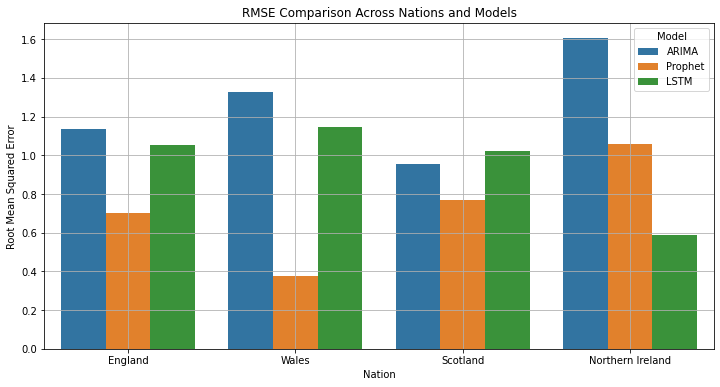

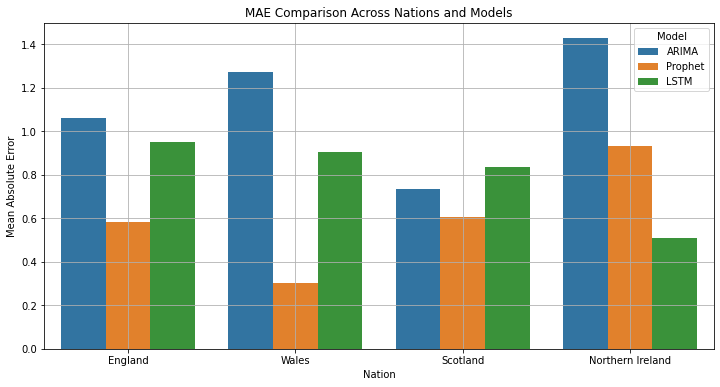

In [149]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=combined_results, x='Nation', y='RMSE', hue='Model')
plt.title("RMSE Comparison Across Nations and Models")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=combined_results, x='Nation', y='MAE', hue='Model')
plt.title("MAE Comparison Across Nations and Models")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.show()


Identify the Best Model per Nation

In [150]:
best_by_nation = combined_results.loc[combined_results.groupby('Nation')['RMSE'].idxmin()]
print("Best Model by RMSE per Nation:")
display(best_by_nation[['Nation', 'Model', 'RMSE', 'MAE']])


Best Model by RMSE per Nation:


,Nation,Model,RMSE,MAE
4,England,Prophet,0.702,0.583
11,Northern Ireland,LSTM,0.586,0.511
6,Scotland,Prophet,0.770,0.605
5,Wales,Prophet,0.378,0.302


#### Nation-Level Suicide Rate Projections (2024–2028) Using ARIMA, Prophet, and LSTM Models

ARIMA 5-Year Forecasts (Nation-Level)

England - MSE: 1.29, RMSE: 1.14


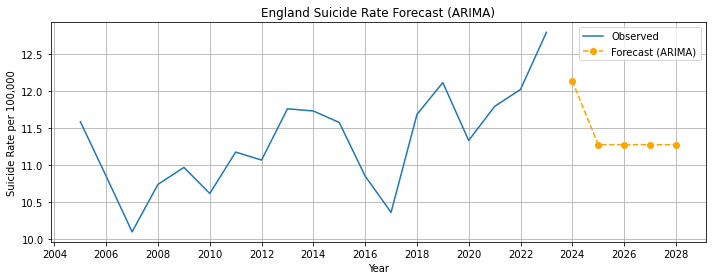

England - 5-Year Forecast (ARIMA):
2024-01-01    12.14
2025-01-01    11.28
2026-01-01    11.28
2027-01-01    11.28
2028-01-01    11.28
Freq: AS-JAN, dtype: float64

--------------------------------------------------

Northern Ireland - MSE: 2.58, RMSE: 1.61


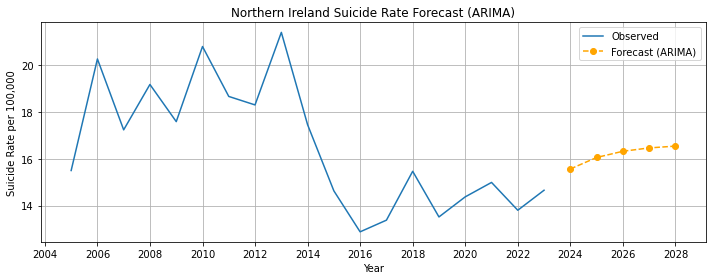

Northern Ireland - 5-Year Forecast (ARIMA):
2024-01-01    15.56
2025-01-01    16.06
2026-01-01    16.32
2027-01-01    16.46
2028-01-01    16.54
Freq: AS-JAN, dtype: float64

--------------------------------------------------

Scotland - MSE: 0.92, RMSE: 0.96


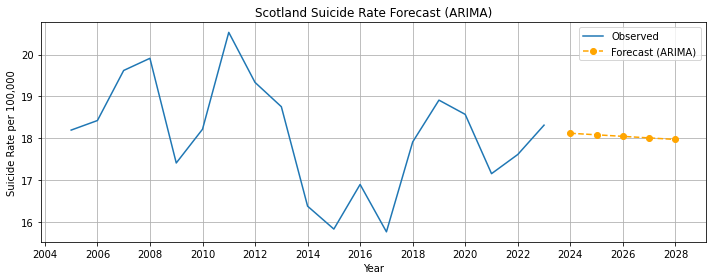

Scotland - 5-Year Forecast (ARIMA):
2024-01-01    18.12
2025-01-01    18.08
2026-01-01    18.05
2027-01-01    18.01
2028-01-01    17.97
Freq: AS-JAN, dtype: float64

--------------------------------------------------

Wales - MSE: 1.75, RMSE: 1.32


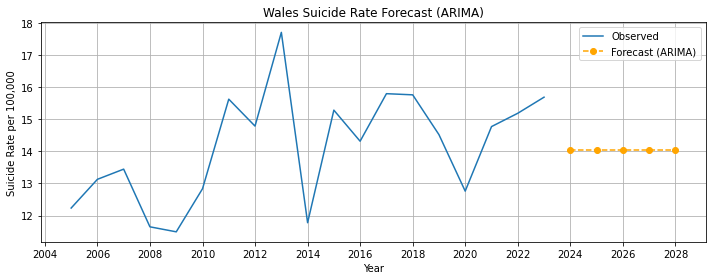

Wales - 5-Year Forecast (ARIMA):
2024-01-01    14.05
2025-01-01    14.05
2026-01-01    14.05
2027-01-01    14.05
2028-01-01    14.05
Freq: AS-JAN, dtype: float64

--------------------------------------------------



In [151]:
# Load Dataset
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Aggregate Average Suicide Rate per Year per Nation 
df_grouped = df.groupby(['Nation', 'Year'])['Rate (per 100,000)'].mean().reset_index()
df_grouped.rename(columns={'Rate (per 100,000)': 'Suicide_Rate'}, inplace=True)

# Convert 'Year' column to datetime
df_grouped['Year'] = pd.to_datetime(df_grouped['Year'], format='%Y')

# Forecast horizon
forecast_years = 5
arima_forecasts = {} 

# ARIMA Modeling per Nation
for nation in df_grouped['Nation'].unique():
    nation_df = df_grouped[df_grouped['Nation'] == nation].copy()
    nation_df.set_index('Year', inplace=True)
    
    # Train-test split (last 3 years as test)
    train = nation_df.iloc[:-3]
    test = nation_df.iloc[-3:]
    
    # Fit ARIMA on training data
    model = auto_arima(train['Suicide_Rate'], seasonal=False, stepwise=True, suppress_warnings=True)
    
    # Predict on test period
    test_pred = model.predict(n_periods=3)
    
    # Evaluation
    mse = mean_squared_error(test['Suicide_Rate'], test_pred)
    rmse = sqrt(mse)
    print(f"{nation} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    
    # Refit on full data for future forecast
    model.update(nation_df['Suicide_Rate'])
    forecast = model.predict(n_periods=forecast_years)
    
    # Generate future datetime index
    last_year = nation_df.index[-1]
    future_dates = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=forecast_years, freq='YS')
    
    # Store forecast
    arima_forecasts[nation] = pd.Series(forecast, index=future_dates)
    
    # Plot Actual + Forecast
    plt.figure(figsize=(10, 4))
    plt.plot(nation_df.index, nation_df['Suicide_Rate'], label='Observed')
    plt.plot(future_dates, forecast, label='Forecast (ARIMA)', linestyle='--', color='orange', marker='o')
    plt.title(f'{nation} Suicide Rate Forecast (ARIMA)')
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate per 100,000')
    
    # Format x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(YearLocator(base=2))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print forecasted values
    print(f"{nation} - 5-Year Forecast (ARIMA):")
    print(arima_forecasts[nation].round(2))
    print("\n" + "-"*50 + "\n")


Prophet 5-Year Forecasts (Nation-Level)

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1


England - MSE: 0.49, RMSE: 0.70


INFO:cmdstanpy:finish chain 1


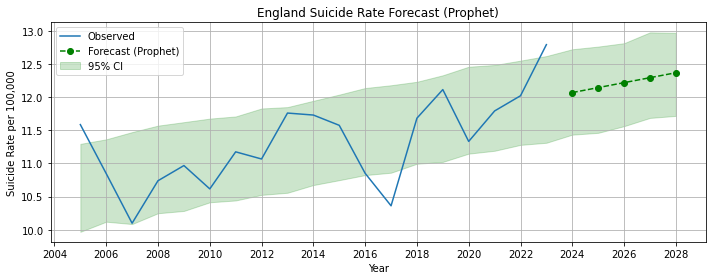

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


England - 5-Year Forecast (Prophet):
ds
2024-01-01    12.07
2025-01-01    12.14
2026-01-01    12.22
2027-01-01    12.29
2028-01-01    12.37
Name: yhat, dtype: float64

--------------------------------------------------



INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1


Northern Ireland - MSE: 1.12, RMSE: 1.06


INFO:cmdstanpy:finish chain 1


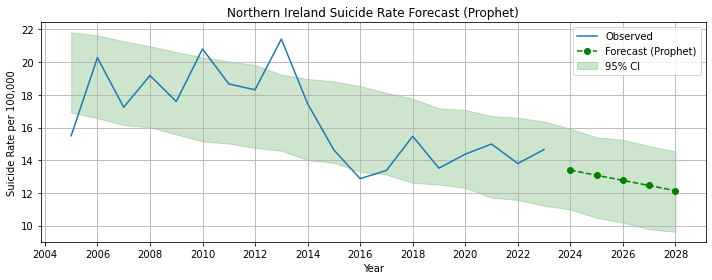

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1


Northern Ireland - 5-Year Forecast (Prophet):
ds
2024-01-01    13.40
2025-01-01    13.08
2026-01-01    12.77
2027-01-01    12.45
2028-01-01    12.14
Name: yhat, dtype: float64

--------------------------------------------------



INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1


Scotland - MSE: 0.59, RMSE: 0.77


INFO:cmdstanpy:finish chain 1


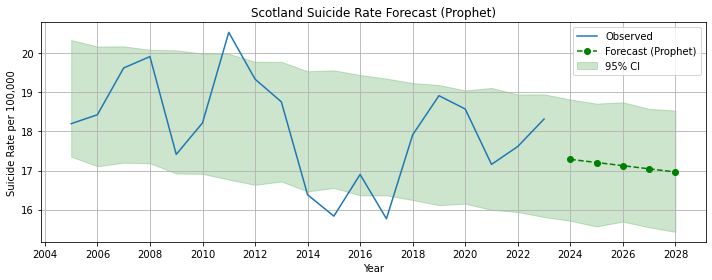

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:cmdstanpy:start chain 1


Scotland - 5-Year Forecast (Prophet):
ds
2024-01-01    17.29
2025-01-01    17.20
2026-01-01    17.12
2027-01-01    17.04
2028-01-01    16.96
Name: yhat, dtype: float64

--------------------------------------------------



INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1


Wales - MSE: 0.14, RMSE: 0.38


INFO:cmdstanpy:finish chain 1


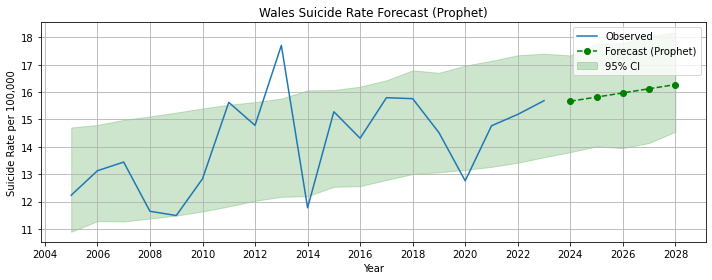

Wales - 5-Year Forecast (Prophet):
ds
2024-01-01    15.67
2025-01-01    15.82
2026-01-01    15.97
2027-01-01    16.12
2028-01-01    16.27
Name: yhat, dtype: float64

--------------------------------------------------



In [152]:
# Load Dataset
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Aggregate Average Suicide Rate per Year per Nation 
df_grouped = df.groupby(['Nation', 'Year'])['Rate (per 100,000)'].mean().reset_index()
df_grouped.rename(columns={'Rate (per 100,000)': 'Suicide_Rate'}, inplace=True)

# Convert 'Year' column to datetime
df_grouped['Year'] = pd.to_datetime(df_grouped['Year'], format='%Y')

# Forecast horizon
forecast_years = 5
prophet_forecasts = {} 

# Prophet Modeling per Nation
for nation in df_grouped['Nation'].unique():
    nation_df = df_grouped[df_grouped['Nation'] == nation].copy()
    nation_df = nation_df[['Year', 'Suicide_Rate']].rename(columns={'Year': 'ds', 'Suicide_Rate': 'y'})

    # Train-test split (last 3 years as test)
    train = nation_df.iloc[:-3]
    test = nation_df.iloc[-3:]

    # Fit Prophet on training data
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(train)

    # Create future dataframe for test period (3 years)
    future_test = model.make_future_dataframe(periods=3, freq='YS')
    forecast_test = model.predict(future_test)

    # Get only the predicted y values for test years
    test_pred = forecast_test[['ds', 'yhat']].set_index('ds').loc[test['ds']]

    # Evaluation
    mse = mean_squared_error(test['y'].values, test_pred['yhat'].values)
    rmse = sqrt(mse)
    print(f"{nation} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Refit on full data for final 5-year forecast
    full_model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    full_model.fit(nation_df)

    # Create future dataframe for 5-year forecast
    future = full_model.make_future_dataframe(periods=forecast_years, freq='YS')
    forecast = full_model.predict(future)

    # Extract only future forecasts
    forecast_future = forecast[['ds', 'yhat']].set_index('ds').iloc[-forecast_years:]
    prophet_forecasts[nation] = forecast_future['yhat']

    # Plot observed + forecast
    plt.figure(figsize=(10, 4))
    plt.plot(nation_df['ds'], nation_df['y'], label='Observed')
    plt.plot(forecast_future.index, forecast_future['yhat'], label='Forecast (Prophet)', linestyle='--', marker='o', color='green')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='95% CI')
    plt.title(f'{nation} Suicide Rate Forecast (Prophet)')
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate per 100,000')

    # Format x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(YearLocator(base=2))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print forecasted values
    print(f"{nation} - 5-Year Forecast (Prophet):")
    print(forecast_future['yhat'].round(2))
    print("\n" + "-"*50 + "\n")


LSTM 5-Year Forecasts (Nation-Level)

England - MSE: 0.89, RMSE: 0.94


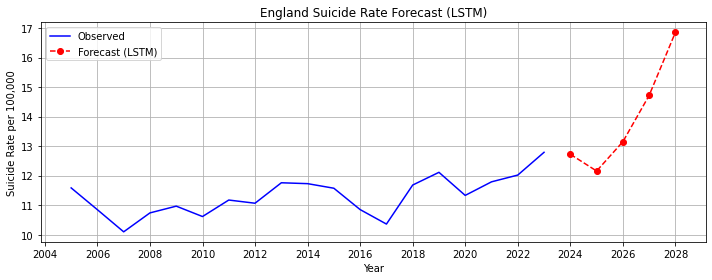

England - 5-Year Forecast (LSTM):
2024-01-01    12.730000
2025-01-01    12.160000
2026-01-01    13.150000
2027-01-01    14.720000
2028-01-01    16.860001
Freq: AS-JAN, dtype: float32

--------------------------------------------------



Northern Ireland - MSE: 0.39, RMSE: 0.63


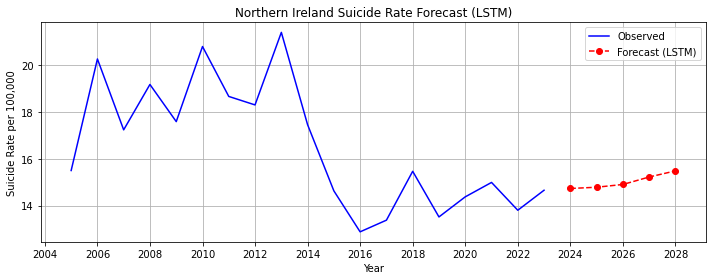

Northern Ireland - 5-Year Forecast (LSTM):
2024-01-01    14.73
2025-01-01    14.78
2026-01-01    14.90
2027-01-01    15.22
2028-01-01    15.48
Freq: AS-JAN, dtype: float32

--------------------------------------------------

Scotland - MSE: 0.88, RMSE: 0.94


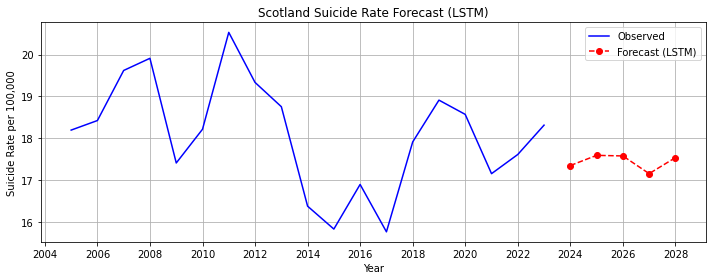

Scotland - 5-Year Forecast (LSTM):
2024-01-01    17.350000
2025-01-01    17.590000
2026-01-01    17.580000
2027-01-01    17.160000
2028-01-01    17.540001
Freq: AS-JAN, dtype: float32

--------------------------------------------------

Wales - MSE: 1.16, RMSE: 1.08


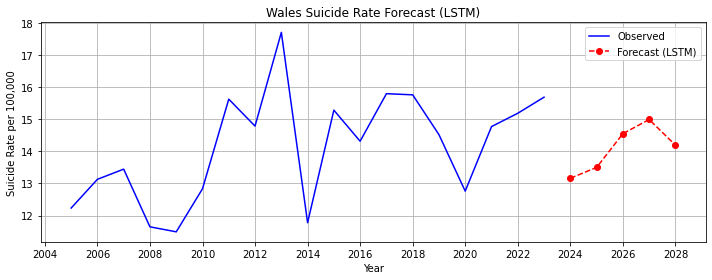

Wales - 5-Year Forecast (LSTM):
2024-01-01    13.16
2025-01-01    13.50
2026-01-01    14.55
2027-01-01    14.99
2028-01-01    14.19
Freq: AS-JAN, dtype: float32

--------------------------------------------------



In [153]:
# Load & Prepare Data
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Aggregate average suicide rate per nation-year
df_grouped = df.groupby(['Nation', 'Year'])['Rate (per 100,000)'].mean().reset_index()
df_grouped.rename(columns={'Rate (per 100,000)': 'Suicide_Rate'}, inplace=True)

# Convert Year to end-of-year datetime
df_grouped['Year'] = pd.to_datetime(df_grouped['Year'], format='%Y')
#  + pd.offsets.YearEnd(0)

# Forecast settings
n_years = 5
lookback = 5
lstm_forecasts = {}

# LSTM per Nation
for nation in df_grouped['Nation'].unique():
    nation_df = df_grouped[df_grouped['Nation'] == nation][['Year', 'Suicide_Rate']].copy()
    data = nation_df['Suicide_Rate'].values.reshape(-1, 1)

    # Normalize
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(len(data_scaled) - lookback):
        X.append(data_scaled[i:i + lookback])
        y.append(data_scaled[i + lookback])
    X, y = np.array(X), np.array(y)

    # Split: last 3 years as test
    split_idx = -3
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Build and train LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(lookback, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=200, verbose=0)

    # Predict on test
    y_test_pred = model.predict(X_test, verbose=0)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_test_pred).flatten()

    # Evaluation
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = sqrt(mse)
    print(f"{nation} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")

    # Retrain on full data
    model.fit(X, y, epochs=200, verbose=0)

    # Forecast 5 years ahead
    input_seq = data_scaled[-lookback:].reshape(1, lookback, 1)
    forecast_scaled = []
    for _ in range(n_years):
        pred = model.predict(input_seq, verbose=0)
        forecast_scaled.append(pred[0, 0])
        input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1)).flatten()

    # Future date index (year-end)
    last_year = nation_df['Year'].max()
    future_years = pd.date_range(start=last_year + pd.DateOffset(years=1), periods=n_years, freq='YS')
    lstm_forecasts[nation] = pd.Series(forecast, index=future_years)

    # Plot actual + forecast
    plt.figure(figsize=(10, 4))
    plt.plot(nation_df['Year'], nation_df['Suicide_Rate'], label='Observed', color='blue')
    plt.plot(future_years, forecast, label='Forecast (LSTM)', linestyle='--', color='red', marker='o')
    plt.title(f'{nation} Suicide Rate Forecast (LSTM)')
    plt.xlabel('Year')
    plt.ylabel('Suicide Rate per 100,000')

    # Format x-axis
    ax = plt.gca()
    ax.xaxis.set_major_locator(YearLocator(base=2))
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print forecasted values
    print(f"{nation} - 5-Year Forecast (LSTM):")
    print(lstm_forecasts[nation].round(2))
    print("\n" + "-"*50 + "\n")


#### Forecasting Suicide Rates by Sex and Age Group Using ARIMA, Prophet, and LSTM

In [154]:
df = pd.read_csv("UK_Suicide_cleaned.csv")

# Focus on required columns
df = df[['Year', 'Sex', 'Age Group', 'Rate (per 100,000)']]
df = df.groupby(['Year', 'Sex', 'Age Group'], as_index=False).mean()
df


,Year,Sex,Age Group,"Rate (per 100,000)"
0,2005,Female,15-34,7.1975
1,2005,Female,35-44,6.0475
2,2005,Female,45-54,9.0150
3,2005,Female,55-64,8.2825
4,2005,Female,65+,5.4375
...,...,...,...,...
185,2023,Male,15-34,20.8575
186,2023,Male,35-44,30.0750
187,2023,Male,45-54,29.7925
188,2023,Male,55-64,21.8450


In [155]:
# Create dictionary of time series per demographic group
grouped_series = {}

for (sex, age_group), group_df in df.groupby(['Sex', 'Age Group']):
    ts = group_df.sort_values('Year')['Rate (per 100,000)'].values
    years = group_df.sort_values('Year')['Year'].values
    if len(ts) >= 15:  # Ensure enough data points
        grouped_series[(sex, age_group)] = (years, ts)

print(f"Total demographic groups modeled: {len(grouped_series)}")


Total demographic groups modeled: 10


ARIMA Forecasts by Demographic Group (Sex × Age)

In [156]:
arima_results = {}

for key, (years, ts) in grouped_series.items():
    sex, age_group = key
    try:
        model = ARIMA(ts, order=(2,1,2))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)
        
        future_years = np.arange(years[-1]+1, years[-1]+6)
        arima_results[key] = {
            "historical_years": years,
            "historical_rates": ts,
            "forecast_years": future_years,
            "forecast_rates": forecast
        }
    except:
        continue
        

C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Prophet Forecasts by Demographic Group (Sex × Age)

In [157]:
prophet_results = {}

for key, (years, ts) in grouped_series.items():
    sex, age_group = key
    df_prophet = pd.DataFrame({
        "ds": pd.to_datetime(years, format='%Y'),
        "y": ts
    })
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=6, freq='Y')
    forecast = model.predict(future)
    
    # Keep only forecast years strictly after the last observed year
    forecast = forecast[forecast['ds'].dt.year > years[-1]]

    forecast_years = forecast['ds'].dt.year.values
    forecast_rates = forecast['yhat'].values
    
    prophet_results[key] = {
        "historical_years": years,
        "historical_rates": ts,
        "forecast_years": forecast_years,
        "forecast_rates": forecast_rates
    }
    

INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:n_changepoints greater than number of observation

In [158]:
# Define LSTM utilities
def prepare_lstm_data(series, lookback=5):
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


LSTM Forecasts by Demographic Group (Sex × Age)

In [159]:
#  Fit LSTM model for each demographic group and forecast 5 years
lstm_results = {}

for key, (years, ts) in grouped_series.items():
    sex, age_group = key
    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.reshape(-1, 1)).flatten()

    X, y = prepare_lstm_data(ts_scaled, lookback=5)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    model = build_lstm_model((X.shape[1], 1))
    model.fit(X, y, epochs=100, verbose=0)

    # Forecast next 5 years
    input_seq = ts_scaled[-5:].reshape(1, 5, 1)
    preds_scaled = []
    for _ in range(5):
        pred = model.predict(input_seq)[0][0]
        preds_scaled.append(pred)
        input_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)

    preds = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).flatten()
    future_years = np.arange(years[-1] + 1, years[-1] + 6)

    # Save results
    lstm_results[key] = {
        "historical_years": years,
        "historical_rates": ts,
        "forecast_years": future_years,
        "forecast_rates": preds
    }
    

1/1 [==============================] - 0s 42ms/step


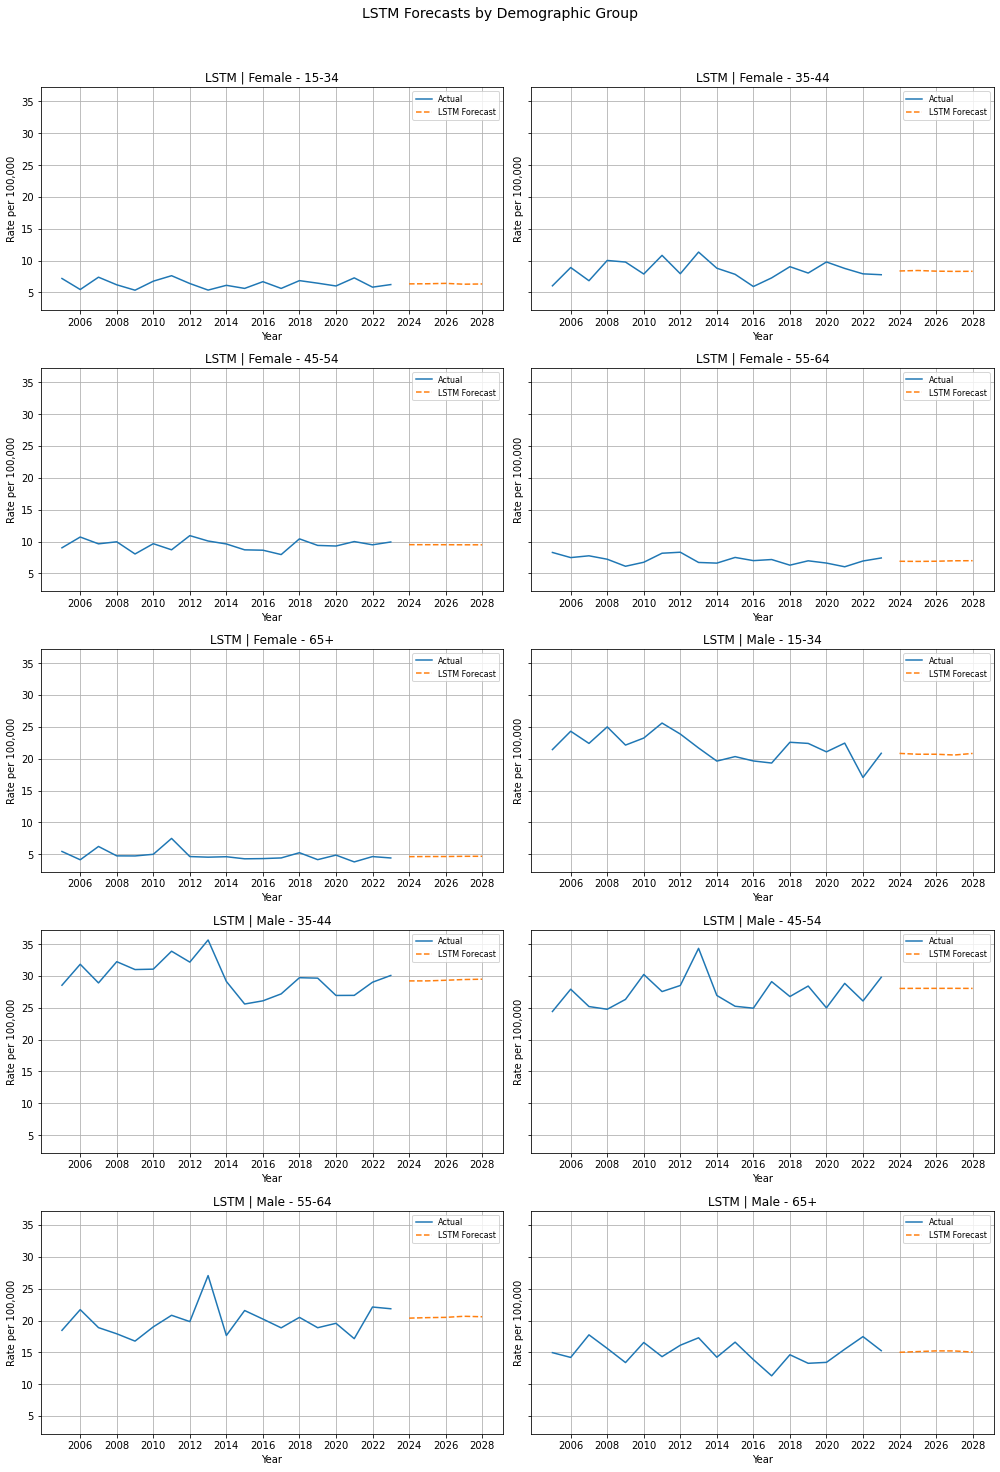

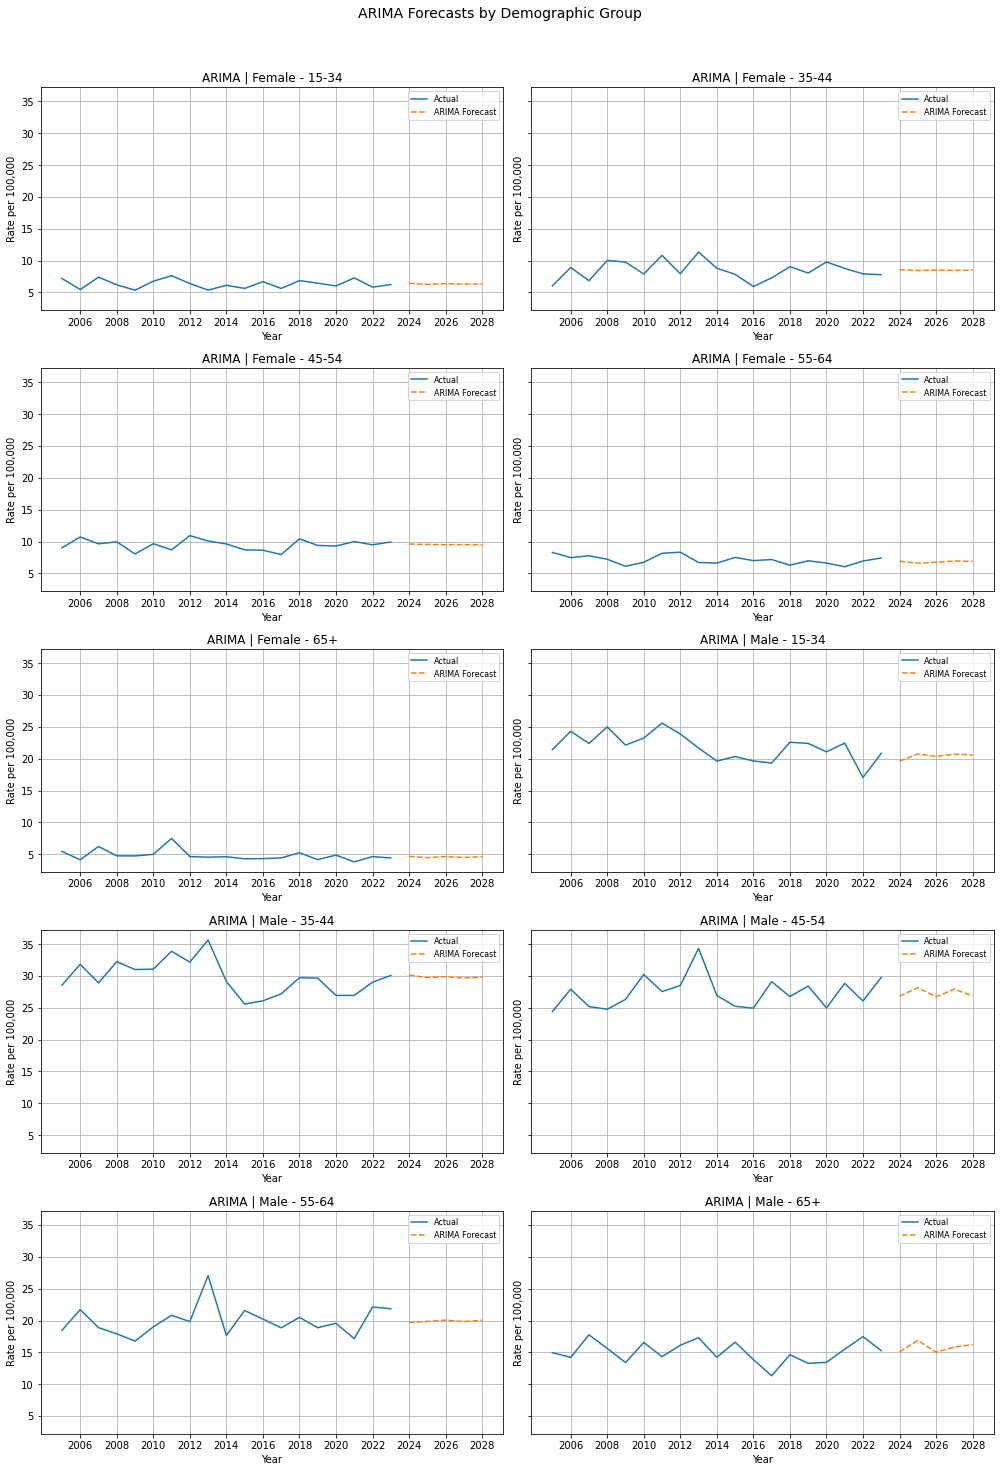

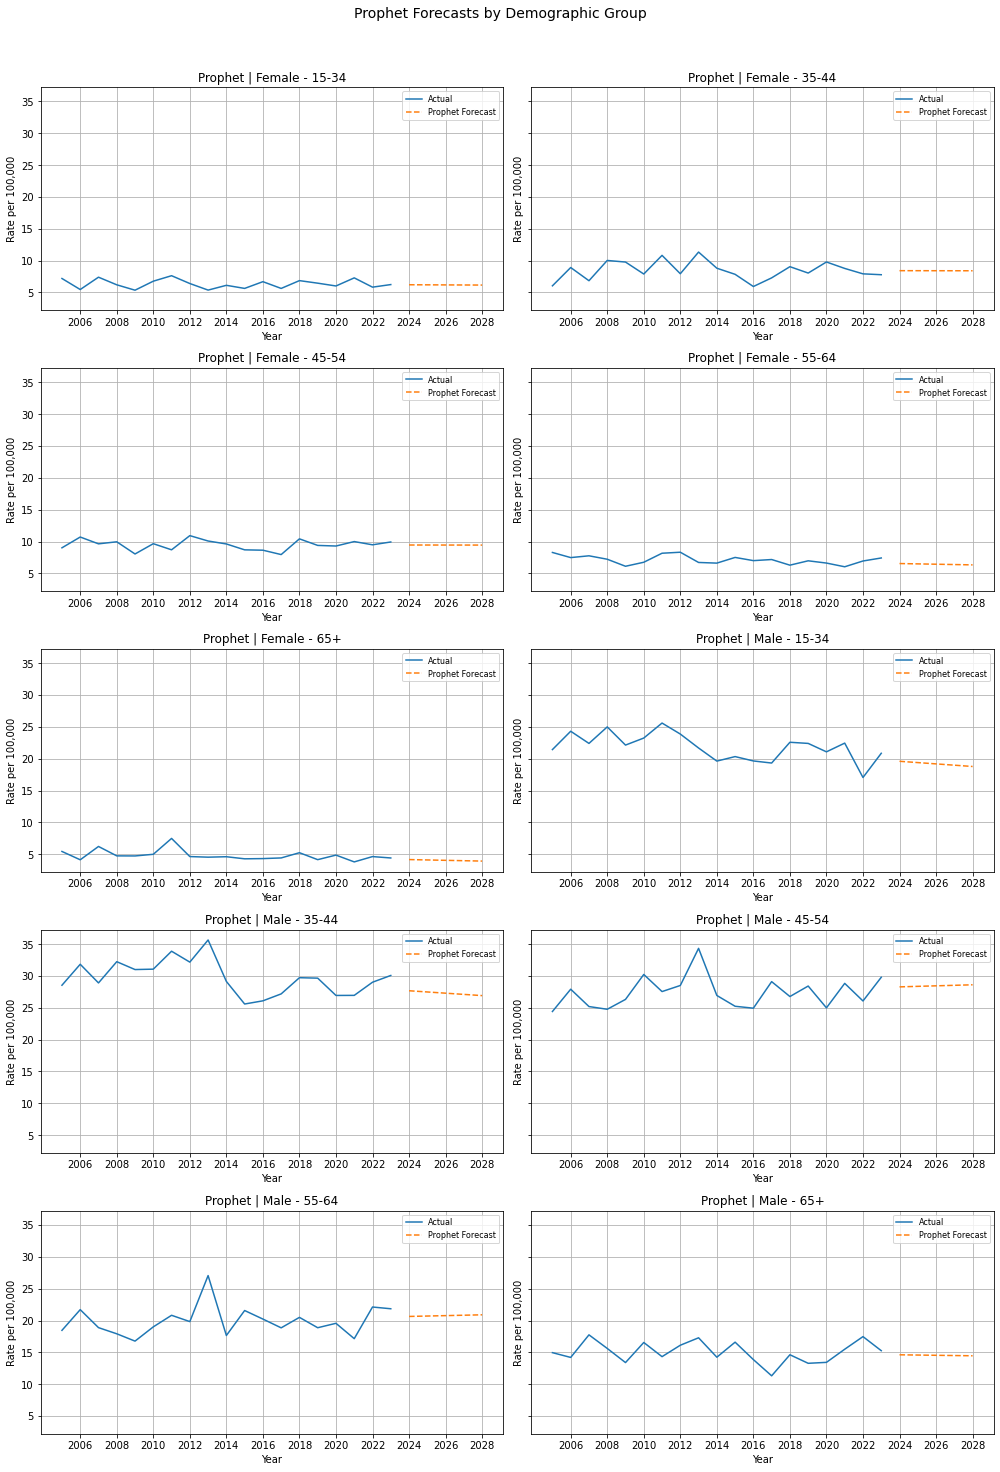

In [160]:
# Plot forecasts for each model separately
for model_name, model_results in [("LSTM", lstm_results), ("ARIMA", arima_results), ("Prophet", prophet_results)]:
    keys = list(model_results.keys())
    n_groups = len(keys)
    n_cols = 2
    n_rows = math.ceil(n_groups / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharey=True)
    axes = axes.flatten()

    for idx, key in enumerate(keys):
        sex, age_group = key
        data = model_results[key]
        ax = axes[idx]

        all_years = np.concatenate([data["historical_years"], data["forecast_years"]])
        min_year, max_year = int(all_years.min()), int(all_years.max())
        all_ticks = np.arange(min_year, max_year + 1)
        even_years = [year for year in all_ticks if year % 2 == 0]

        ax.plot(data["historical_years"], data["historical_rates"], label="Actual")
        ax.plot(data["forecast_years"], data["forecast_rates"], label=f"{model_name} Forecast", linestyle="--")

        ax.set_title(f"{model_name} | {sex} - {age_group}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Rate per 100,000")
        ax.set_xticks(even_years)
        ax.grid(True)
        ax.legend(fontsize=8)

    # Hide empty subplots if number of groups is odd
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"{model_name} Forecasts by Demographic Group", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

Top 5 Sex × Age Groups with Highest Forecasted Suicide Rates

In [161]:
def get_top5_forecasted_groups(model_results, model_name):
    import pandas as pd

    rows = []
    for (sex, age_group), data in model_results.items():
        # Take the max forecasted rate for each group as ranking criteria
        max_forecast_rate = max(data["forecast_rates"])
        rows.append({
            "Sex": sex,
            "Age Group": age_group,
            "Max Forecasted Rate": max_forecast_rate,
            "Model": model_name
        })

    df = pd.DataFrame(rows)
    df_sorted = df.sort_values(by="Max Forecasted Rate", ascending=False).head(5)
    return df_sorted

In [162]:
# Rankings for each model

df_lstm_ranked = get_top5_forecasted_groups(lstm_results, "LSTM")
df_arima_ranked = get_top5_forecasted_groups(arima_results, "ARIMA")
df_prophet_ranked = get_top5_forecasted_groups(prophet_results, "Prophet")

# Print the results
print("Top 5 Forecasted Groups - LSTM Model")
print(df_lstm_ranked)
print("\n" + "="*50 + "\n")

print("Top 5 Forecasted Groups - ARIMA Model")
print(df_arima_ranked)
print("\n" + "="*50 + "\n")

print("Top 5 Forecasted Groups - Prophet Model")
print(df_prophet_ranked)
print("\n" + "="*50 + "\n")

Top 5 Forecasted Groups - LSTM Model
    Sex Age Group  Max Forecasted Rate Model
6  Male     35-44            29.488050  LSTM
7  Male     45-54            28.054474  LSTM
5  Male     15-34            20.837927  LSTM
8  Male     55-64            20.661510  LSTM
9  Male       65+            15.226905  LSTM


Top 5 Forecasted Groups - ARIMA Model
    Sex Age Group  Max Forecasted Rate  Model
6  Male     35-44            30.159467  ARIMA
7  Male     45-54            28.155854  ARIMA
5  Male     15-34            20.743938  ARIMA
8  Male     55-64            20.059654  ARIMA
9  Male       65+            16.868928  ARIMA


Top 5 Forecasted Groups - Prophet Model
    Sex Age Group  Max Forecasted Rate    Model
7  Male     45-54            28.612190  Prophet
6  Male     35-44            27.675334  Prophet
8  Male     55-64            20.894350  Prophet
5  Male     15-34            19.599698  Prophet
9  Male       65+            14.612611  Prophet




This research question investigates the comparative performance of three distinct time-series forecasting models applied to suicide rate data across different age groups in the UK. The analysis aims to identify which model provides the most accurate predictions for each age demographic and understand the underlying factors that influence forecasting accuracy across different population segments.

#### UK-Wide Backtesting of Forecasting Models (2019–2023)

To evaluate the predictive accuracy of three time series models — ARIMA, Prophet and LSTM at the national UK level.

C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Balkrishna Chaugule\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Forecast Comparison (2019–2023):

2019 | Actual: 14.76 | LSTM: 15.04 | ARIMA: 15.04 | Prophet: 14.72
2020 | Actual: 14.26 | LSTM: 15.11 | ARIMA: 15.15 | Prophet: 14.67
2021 | Actual: 14.68 | LSTM: 15.17 | ARIMA: 15.04 | Prophet: 14.61
2022 | Actual: 14.66 | LSTM: 15.21 | ARIMA: 15.14 | Prophet: 14.56
2023 | Actual: 15.36 | LSTM: 15.22 | ARIMA: 15.06 | Prophet: 14.50

RMSE Comparison:
LSTM:    0.5223
ARIMA:   0.5176
Prophet: 0.4281


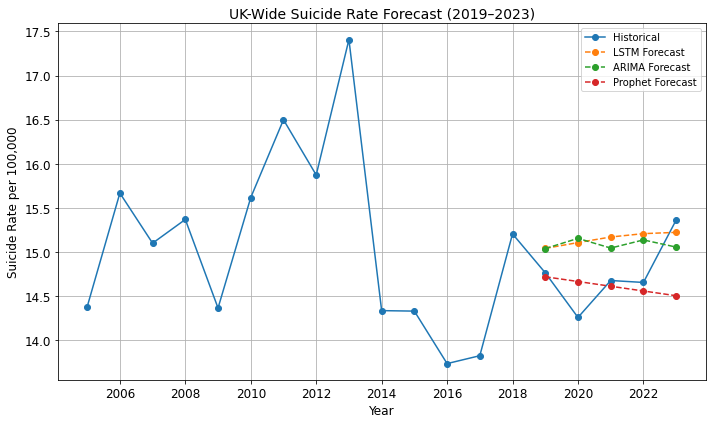

In [163]:
# Load and preprocess data
df = pd.read_csv("UK_Suicide_cleaned.csv")
df = df[['Year', 'Rate (per 100,000)']]
df_national = df.groupby('Year', as_index=False).mean()
years = df_national['Year'].values
rates = df_national['Rate (per 100,000)'].values

# Hold out last 5 years for backtesting
train_years, test_years = years[:-5], years[-5:]
train_rates, test_rates = rates[:-5], rates[-5:]
future_years = test_years

### ---- LSTM ---- ###
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_rates.reshape(-1, 1)).flatten()

def prepare_lstm_data(series, lookback=5):
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback])
    return np.array(X), np.array(y)

X_lstm, y_lstm = prepare_lstm_data(train_scaled, lookback=5)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_lstm, y_lstm, epochs=100, verbose=0)

input_seq = train_scaled[-5:].reshape(1, 5, 1)
lstm_preds_scaled = []
for _ in range(5):
    pred = model_lstm.predict(input_seq, verbose=0)[0][0]
    lstm_preds_scaled.append(pred)
    input_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)

lstm_forecast = scaler.inverse_transform(np.array(lstm_preds_scaled).reshape(-1, 1)).flatten()
rmse_lstm = mean_squared_error(test_rates, lstm_forecast, squared=False)

### ---- ARIMA ---- ###
model_arima = ARIMA(train_rates, order=(2, 1, 2))
fit_arima = model_arima.fit()
arima_forecast = fit_arima.forecast(steps=5)
rmse_arima = mean_squared_error(test_rates, arima_forecast, squared=False)

### ---- Prophet ---- ###
df_prophet = pd.DataFrame({
    'ds': pd.to_datetime(train_years, format='%Y'),
    'y': train_rates
})
model_prophet = Prophet(yearly_seasonality=False)
model_prophet.fit(df_prophet)
future_df = model_prophet.make_future_dataframe(periods=5, freq='Y')
forecast_prophet = model_prophet.predict(future_df)
prophet_forecast = forecast_prophet['yhat'].values[-5:]
rmse_prophet = mean_squared_error(test_rates, prophet_forecast, squared=False)

### ---- Combine and Compare ---- ###
print("Forecast Comparison (2019–2023):\n")
for i in range(5):
    print(f"{test_years[i]} | Actual: {test_rates[i]:.2f} | LSTM: {lstm_forecast[i]:.2f} | ARIMA: {arima_forecast[i]:.2f} | Prophet: {prophet_forecast[i]:.2f}")

print("\nRMSE Comparison:")
print(f"LSTM:    {rmse_lstm:.4f}")
print(f"ARIMA:   {rmse_arima:.4f}")
print(f"Prophet: {rmse_prophet:.4f}")

### ---- Plot ---- ###
plt.figure(figsize=(10, 6))
plt.plot(years, rates, label='Historical', marker='o')
plt.plot(test_years, lstm_forecast, '--',marker='o', label='LSTM Forecast')
plt.plot(test_years, arima_forecast, '--',marker='o', label='ARIMA Forecast')
plt.plot(test_years, prophet_forecast, '--',marker='o', label='Prophet Forecast')
plt.xlabel('Year', fontsize='12')
plt.ylabel('Suicide Rate per 100,000', fontsize='12')
plt.title('UK-Wide Suicide Rate Forecast (2019–2023)', fontsize='14')
plt.legend()
plt.grid(True)
# Show only even years on x-axis
all_years = np.arange(years.min(), years.max() + 1)
even_years = [year for year in all_years if year % 2 == 0]
plt.xticks(even_years, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [164]:
# # Load and preprocess data
# df = pd.read_csv("UK_Suicide_cleaned.csv")
# df = df[['Year', 'Rate (per 100,000)']]
# df_national = df.groupby('Year', as_index=False).mean()
# years = df_national['Year'].values
# rates = df_national['Rate (per 100,000)'].values

# # Use all available data for training (no backtesting split)
# train_years_full = years
# train_rates_full = rates

# ### ---- LSTM ---- ###
# scaler_full = MinMaxScaler()
# train_scaled_full = scaler_full.fit_transform(train_rates_full.reshape(-1, 1)).flatten()

# def prepare_lstm_data(series, lookback=5):
#     X, y = [], []
#     for i in range(len(series) - lookback):
#         X.append(series[i:i+lookback])
#         y.append(series[i+lookback])
#     return np.array(X), np.array(y)

# X_lstm_full, y_lstm_full = prepare_lstm_data(train_scaled_full, lookback=5)
# X_lstm_full = X_lstm_full.reshape((X_lstm_full.shape[0], X_lstm_full.shape[1], 1))

# model_lstm_full = Sequential()
# model_lstm_full.add(LSTM(50, activation='relu', input_shape=(X_lstm_full.shape[1], 1)))
# model_lstm_full.add(Dense(1))
# model_lstm_full.compile(optimizer='adam', loss='mse')
# model_lstm_full.fit(X_lstm_full, y_lstm_full, epochs=100, verbose=0)

# input_seq_full = train_scaled_full[-5:].reshape(1, 5, 1)
# lstm_future_scaled = []
# for _ in range(5):
#     pred = model_lstm_full.predict(input_seq_full, verbose=0)[0][0]
#     lstm_future_scaled.append(pred)
#     input_seq_full = np.append(input_seq_full[:, 1:, :], [[[pred]]], axis=1)

# lstm_future_forecast = scaler_full.inverse_transform(np.array(lstm_future_scaled).reshape(-1, 1)).flatten()

# ### ---- ARIMA ---- ###
# model_arima_full = ARIMA(train_rates_full, order=(2, 1, 2))
# fit_arima_full = model_arima_full.fit()
# arima_future_forecast = fit_arima_full.forecast(steps=5)

# ### ---- Prophet ---- ###
# df_prophet_full = pd.DataFrame({
#     'ds': pd.to_datetime(train_years_full, format='%Y'),
#     'y': train_rates_full
# })
# model_prophet_full = Prophet(yearly_seasonality=False)
# model_prophet_full.fit(df_prophet_full)
# future_df_full = model_prophet_full.make_future_dataframe(periods=5, freq='Y')
# forecast_prophet_full = model_prophet_full.predict(future_df_full)
# prophet_future_forecast = forecast_prophet_full['yhat'].values[-5:]

# ### ---- Display Forecasts ---- ###
# future_years_real = np.arange(train_years_full[-1] + 1, train_years_full[-1] + 6)

# print("Future Forecast (2024–2028):\n")
# for i in range(5):
#     print(f"{future_years_real[i]} | LSTM: {lstm_future_forecast[i]:.2f} | "
#           f"ARIMA: {arima_future_forecast[i]:.2f} | Prophet: {prophet_future_forecast[i]:.2f}")

# ### ---- Plot ---- ###
# plt.figure(figsize=(12, 6))
# plt.plot(years, rates, label='Historical', marker='o')
# plt.plot(future_years_real, lstm_future_forecast, '--', marker='o', label='LSTM Forecast')
# plt.plot(future_years_real, arima_future_forecast, '--', marker='o', label='ARIMA Forecast')
# plt.plot(future_years_real, prophet_future_forecast, '--', marker='o', label='Prophet Forecast')
# plt.xlabel('Year', color='white', fontsize='14')
# plt.ylabel('Suicide Rate per 100,000', color='white', fontsize='14')
# plt.title('UK-Wide Suicide Rate Forecast (2024–2028)', color='white', fontsize='14')
# plt.legend()
# plt.grid(True)
# # Show only even years on x-axis
# all_years = np.arange(years.min(), future_years_real[-1] + 1)
# even_years = [year for year in all_years if year % 2 == 0]
# plt.xticks(even_years)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.tight_layout()
# plt.show()

#### UK Suicide Rate Forecast (2024–2028)

To generate forward-looking forecasts of UK-wide suicide rates using the most recent 5 years (2019–2023) as the training set.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


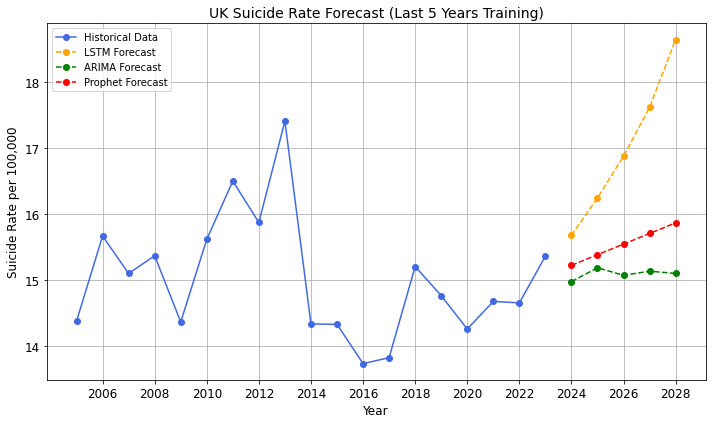


--- Forecast for Next 5 Years (Trained on Last 5 Years) ---
2024 | LSTM: 15.68 | ARIMA: 14.98 | Prophet: 15.22
2025 | LSTM: 16.24 | ARIMA: 15.19 | Prophet: 15.38
2026 | LSTM: 16.88 | ARIMA: 15.07 | Prophet: 15.55
2027 | LSTM: 17.62 | ARIMA: 15.13 | Prophet: 15.71
2028 | LSTM: 18.64 | ARIMA: 15.10 | Prophet: 15.87


In [165]:
lookback = 3
future_steps = 5

# Load and preprocess data
df = pd.read_csv("UK_Suicide_cleaned.csv")
df = df[['Year', 'Rate (per 100,000)']]
df_national = df.groupby('Year', as_index=False).mean()
years = df_national['Year'].values
rates = df_national['Rate (per 100,000)'].values

# Use only last 5 years for training
train_years = years[-5:]
train_rates = rates[-5:]

# ===============================
# --- LSTM ---
# ===============================
def prepare_lstm_data(series, lookback):
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_rates.reshape(-1, 1)).flatten()
X_lstm, y_lstm = prepare_lstm_data(scaled_train, lookback=lookback)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_lstm, y_lstm, epochs=300, verbose=0)

input_seq = scaled_train[-lookback:].reshape(1, lookback, 1)
lstm_preds_scaled = []
for _ in range(future_steps):
    pred = model_lstm.predict(input_seq, verbose=0)[0][0]
    lstm_preds_scaled.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
lstm_forecast = scaler.inverse_transform(np.array(lstm_preds_scaled).reshape(-1, 1)).flatten()

# ARIMA
model_arima = ARIMA(train_rates, order=(1, 1, 0))
fit_arima = model_arima.fit()
arima_forecast = fit_arima.forecast(steps=future_steps)

# Prophet
df_prophet = pd.DataFrame({
    'ds': pd.to_datetime(train_years, format='%Y'),
    'y': train_rates
})
model_prophet = Prophet(yearly_seasonality=False)
model_prophet.fit(df_prophet)
future_df = model_prophet.make_future_dataframe(periods=future_steps, freq='Y')
forecast_prophet = model_prophet.predict(future_df)
prophet_forecast = forecast_prophet['yhat'].values[-future_steps:]

# Plot results
future_years = np.arange(train_years[-1] + 1, train_years[-1] + 1 + future_steps)

plt.figure(figsize=(10, 6))

# Historical data
plt.plot(years, rates, label='Historical Data', marker='o', color='royalblue')

# Forecasts
plt.plot(future_years, lstm_forecast, '--', marker='o', label='LSTM Forecast', color='orange')
plt.plot(future_years, arima_forecast, '--', marker='o', label='ARIMA Forecast', color='green')
plt.plot(future_years, prophet_forecast, '--', marker='o', label='Prophet Forecast', color='red')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicide Rate per 100,000', fontsize=12)
plt.title('UK Suicide Rate Forecast (Last 5 Years Training)', fontsize=14)
plt.legend()
plt.grid(True)

# X-ticks every 2 years
even_years = [year for year in range(years.min(), future_years[-1] + 1) if year % 2 == 0]
plt.xticks(even_years, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Print results
print("\n--- Forecast for Next 5 Years (Trained on Last 5 Years) ---")
for i in range(future_steps):
    print(f"{future_years[i]} | LSTM: {lstm_forecast[i]:.2f} | ARIMA: {arima_forecast[i]:.2f} | Prophet: {prophet_forecast[i]:.2f}")


## Social media Analysis

### Data Collection

In [166]:
# # --- Reddit API credentials ---
# reddit = praw.Reddit(
#     client_id='jSHZXfC6-TU_HSwvoKEO8Q',
#     client_secret='_5X_wN8sj1iKFYj6812p_dcD8jdrNA',
#     user_agent='uk-mental-health-research-script'
# )

# # --- UK-relevant subreddits ---
# uk_subreddits = ['unitedkingdom', 'England', 'AskUK', 'CasualUK', 'Scotland', 'NorthernIreland', 'Wales']

# # --- Combined mental health keywords query ---
# keywords = ['depression', 'anxiety', 'suicide', 'self harm', 'mental health', 'therapy', 'counselling']
# query = ' OR '.join([f'"{kw}"' if ' ' in kw else kw for kw in keywords])

# # --- Storage for posts ---
# posts = {}
# max_posts_per_subreddit = 1000

# for subreddit_name in uk_subreddits:
#     subreddit = reddit.subreddit(subreddit_name)
#     print(f"\n🔍 Searching r/{subreddit_name} for mental health keywords")
    
#     try:
#         for post in subreddit.search(query=query, sort='new', limit=max_posts_per_subreddit):
#             created_date = datetime.datetime.utcfromtimestamp(post.created_utc)
#             if created_date.year >= 2021 and post.id not in posts:
#                 title = post.title
#                 body = post.selftext if hasattr(post, 'selftext') else ""
#                 text_content = f"{title}\n{body}".strip()

#                 sentiment = TextBlob(text_content).sentiment

#                 posts[post.id] = {
#                     'id': post.id,
#                     'title': title,
#                     'selftext': body,
#                     'created_utc': created_date.strftime('%Y-%m-%d %H:%M:%S'),
#                     'year': created_date.year,
#                     'month': created_date.month,
#                     'subreddit': subreddit_name,
#                     'keyword_matched': "multiple",
#                     'sentiment_polarity': round(sentiment.polarity, 4),
#                     'sentiment_subjectivity': round(sentiment.subjectivity, 4)
#                 }
#     except Exception as e:
#         print(f"Error while searching r/{subreddit_name}: {e}")
    
#     time.sleep(1)  # Rate limit buffer

# # Convert to DataFrame and save
# df = pd.DataFrame(posts.values())
# df.to_csv('uk_mental_health_reddit_posts.csv', index=False)

# print(f"\nSaved {len(df)} unique posts with sentiment analysis from {len(uk_subreddits)} subreddits.")


### EDA & Cleaning

In [167]:
# Read the CSV file into a DataFrame
df = pd.read_csv("uk_mental_health_reddit_posts.csv")

# Combine title and selftext
df["post_text"] = df["title"].fillna("") + " " + df["selftext"].fillna("")

# Convert to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Remove duplicates & nulls
df.drop_duplicates(subset="post_text", inplace=True)
df.dropna(subset=["post_text"], inplace=True)

# Select the specified columns
selected_columns = df[['id', 'year', 'month', 'subreddit', 'keyword_matched', 'sentiment_polarity', 'sentiment_subjectivity', 'post_text']]

# Display the DataFrame
selected_columns

,id,year,month,subreddit,keyword_matched,sentiment_polarity,sentiment_subjectivity,post_text
0,1mdxghv,2025,7,unitedkingdom,multiple,0.0323,0.5234,Yet another (DOUBLE) miscarriage of justice ha...
1,1mdva9t,2025,7,unitedkingdom,multiple,-0.1000,0.2000,Dine and dash takes a toll on mental health of...
2,1mbvoz4,2025,7,unitedkingdom,multiple,0.0380,0.5226,DAE want to discuss and criticise the Online S...
3,1mbuy1s,2025,7,unitedkingdom,multiple,0.0263,0.4986,Letter to MP RE: Online Safety Act (2023) This...
4,1mbkqpt,2025,7,unitedkingdom,multiple,0.0462,0.5050,Government response to the Repeal the Online S...
...,...,...,...,...,...,...,...,...
1217,nj3z5b,2021,5,Wales,multiple,-0.0011,0.6443,Ynys Mon/Anglesey in film I make these video's...
1218,ndhf5v,2021,5,Wales,multiple,0.0333,0.1893,Welshman in California here - In response to t...
1219,n2e13d,2021,5,Wales,multiple,-0.1250,0.4500,Recently moved to beddau I’ve recently moved t...
1220,l97qe6,2021,1,Wales,multiple,-0.5000,1.0000,There are *some* benefits to waking up with we...


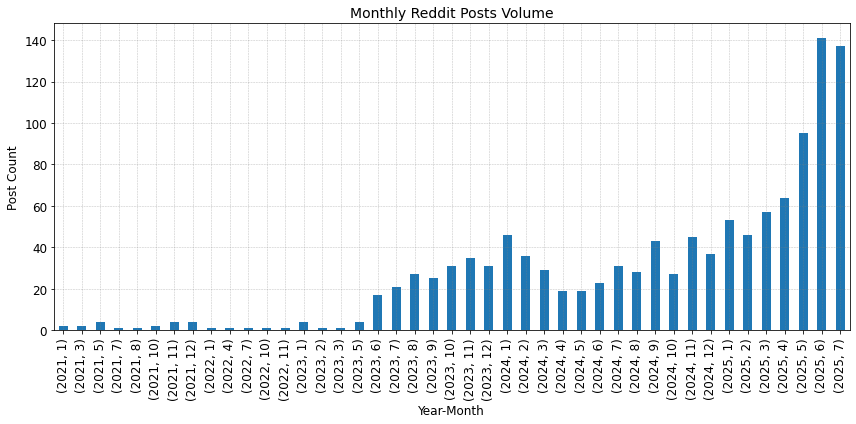

In [168]:
# Load data
df = pd.read_csv("uk_mental_health_reddit_posts.csv")

# Combine title and selftext
df["post_text"] = df["title"].fillna("") + " " + df["selftext"].fillna("")

# Convert to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Remove duplicates & nulls
df.drop_duplicates(subset="post_text", inplace=True)
df.dropna(subset=["post_text"], inplace=True)

# Plot post frequency over time
monthly_counts = df.groupby(["year", "month"]).size()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_counts.plot(kind="bar", ax=ax)

# Title and labels with fontsize 14
ax.set_title("Monthly Reddit Posts Volume", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Post Count", fontsize=12)

ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# Set grid line colors if needed
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()


### Text Preprocessing

[nltk_data] Downloading package stopwords to C:\Users\Balkrishna
[nltk_data]     Chaugule\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Balkrishna
[nltk_data]     Chaugule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Balkrishna
[nltk_data]     Chaugule\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Balkrishna
[nltk_data]     Chaugule\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


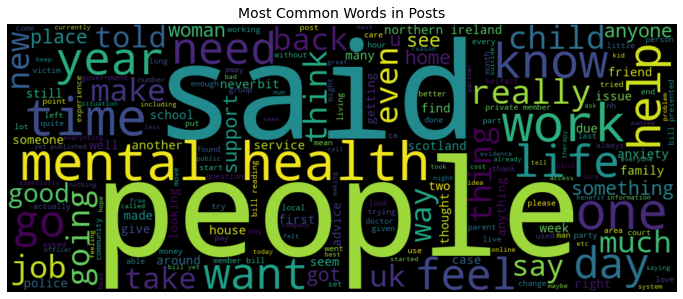

In [169]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r"http\S+|www\S+|\n", "", text.lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df["clean_text"] = df["post_text"].apply(preprocess)

# WordCloud
wordcloud = WordCloud(width=1000, height=400).generate(" ".join(df["clean_text"]))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Posts", fontsize=14)
plt.show()


### Sentiment & Emotion Analysis

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:15<00:00,  1.02it/s]


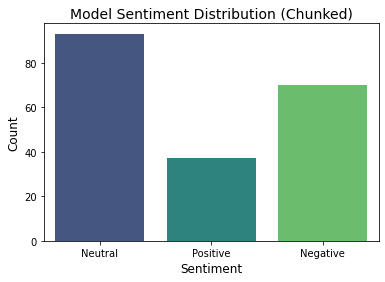

In [170]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", tokenizer=tokenizer)

# Break into chunks
MAX_LEN = 512

def chunk_sentiment(text):
    tokens = tokenizer.encode(text, truncation=False)
    chunks = [tokens[i:i+MAX_LEN] for i in range(0, len(tokens), MAX_LEN)]
    sentiments = []
    for chunk in chunks:
        input_text = tokenizer.decode(chunk, skip_special_tokens=True)
        try:
            result = sentiment_model(input_text)[0]
            sentiments.append(result["label"])
        except:
            continue
    if not sentiments:
        return "ERROR"
    return max(set(sentiments), key=sentiments.count)

# Apply on a sample
sample_df = df.sample(200).copy()
sample_df["model_sentiment"] = [chunk_sentiment(text) for text in tqdm(sample_df["clean_text"])]

# Map model sentiment labels to readable form
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}
sample_df["sentiment_label"] = sample_df["model_sentiment"].map(label_map)

# Plot distribution
sns.countplot(x="sentiment_label", data=sample_df, palette="viridis")
plt.title("Model Sentiment Distribution (Chunked)", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


### Topic Modeling (LDA)

TOPIC #0: week, say, work, said, people, doctor, time, nh, mental, health
TOPIC #1: really, day, know, job, like, time, year, work, mental, health
TOPIC #2: judge, case, officer, victim, woman, child, told, police, court, said
TOPIC #3: published, child, government, reading, presented, said, northern, private, member, ireland
TOPIC #4: want, think, time, really, help, life, feel, know, like, people


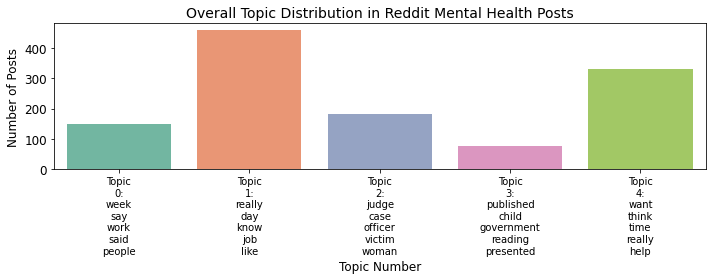

In [171]:
# Vectorize the existing cleaned text
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df["clean_text"])
words = vectorizer.get_feature_names_out()

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topic keywords
topic_labels = []
for index, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    print(f"TOPIC #{index}: {', '.join(top_words)}")
    topic_labels.append(f"Topic {index}: {' '.join(top_words[:5])}")

# Assign most likely topic to each post
topic_distributions = lda.transform(dtm)
dominant_topics = topic_distributions.argmax(axis=1)
df["topic"] = dominant_topics

# OPTIONAL: Visualize overall topic distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(x="topic", data=df, palette="Set2")
plt.title("Overall Topic Distribution in Reddit Mental Health Posts", fontsize=14)
plt.xlabel("Topic Number", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)

# Wrap x-tick labels line by line
wrapped_labels = ["\n".join(label.split()) for label in topic_labels]
plt.xticks(ticks=range(len(topic_labels)), labels=wrapped_labels, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Time Series Aggregation

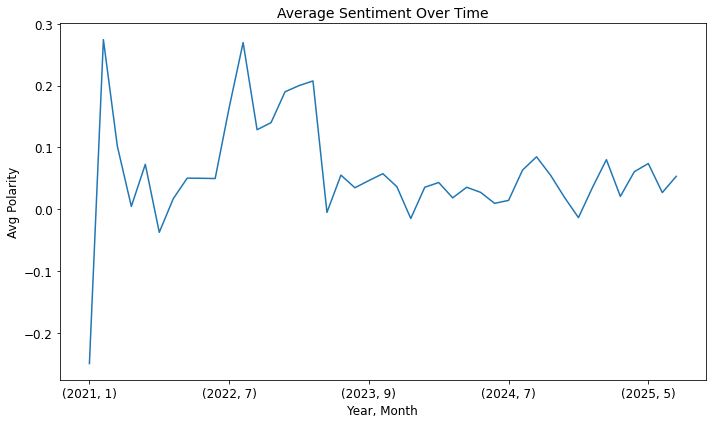

In [172]:
sentiment_by_month = df.groupby(["year", "month"])[["sentiment_polarity"]].mean()
ax = sentiment_by_month.plot(title="Average Sentiment Over Time", figsize=(10,6), fontsize=14, legend=False)
ax.set_title("Average Sentiment Over Time", fontsize=14)
ax.set_xlabel("Year, Month", fontsize=12)
ax.set_ylabel("Avg Polarity", fontsize=12)

# Bigger ticks
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()


### Crisis Classification (Simple)

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        97
           1       0.89      0.92      0.90       143

    accuracy                           0.88       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.88      0.88      0.88       240



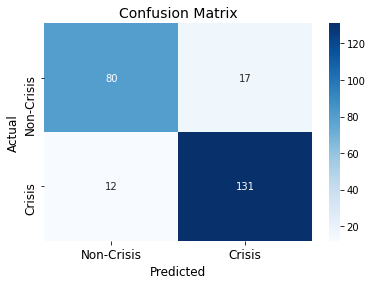

Crisis Class Distribution in Full Dataset:
crisis
1    715
0    483
Name: count, dtype: int64


In [173]:
# Step 1: Label posts as Crisis / Non-Crisis based on keywords
crisis_keywords = [
    # Suicidal ideation / explicit phrases
    'suicide', 'kill myself', 'want to die', 'ending it', 'end my life', 'take my life', 'can’t go on', 'don’t want to live',
    'overdose', 'jump off', 'hang myself', 'cut veins', 'drown myself', 'end it all', 'I feel like killing myself',
    'thinking about ending everything', 'tried to overdose',
    # Self-harm
    'self harm', 'cutting', 'burning myself', 'hurting myself', 'scratch myself', 'self-injury',
    # Depression & hopelessness
    'depression', 'depressed', 'feel hopeless', 'worthless', 'empty', 'no purpose', 'i’m done', 'lost all hope',
    # Anxiety and panic
    'anxiety attack', 'panic attack', 'can’t breathe', 'shaking', 'terrified',
    # Psychosis & trauma
    'hearing voices', 'paranoid', 'flashbacks', 'ptsd', 'trauma', 'can’t sleep', 'nightmares',
    # Isolation and loneliness
    'feel alone', 'no one cares', 'lonely', 'abandoned', 'isolated',
    # Broad mental health terms
    'mental health', 'mental illness', 'mental breakdown', 'mental problems', 'breakdown', 'psych ward', 'sectioned'
]
def label_crisis(text):
    text = text.lower()
    return int(any(keyword in text for keyword in crisis_keywords))

# Make sure we have clean_text column
assert "clean_text" in df.columns, "Missing 'clean_text' column. Please run cleaning first."

df["crisis"] = df["clean_text"].apply(label_crisis)

# Step 2: Prepare features and labels
X = df["clean_text"]
y = df["crisis"]

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train a simple classifier
clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train_vec, y_train)

# Step 6: Evaluate model
y_pred = clf.predict(X_test_vec)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Step 7: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Crisis", "Crisis"],
            yticklabels=["Non-Crisis", "Crisis"])
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Step 8: Class balance check
print("Crisis Class Distribution in Full Dataset:")
print(df["crisis"].value_counts())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
<ipython-input-174-ca1f2b2890f2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["ds"] = pd.to_datetime(test_df["ds"]).dt.to_period("M").dt.to_timestamp()


Forecast Evaluation on Last 12 Months:
MAE  = 0.1288
RMSE = 0.1454


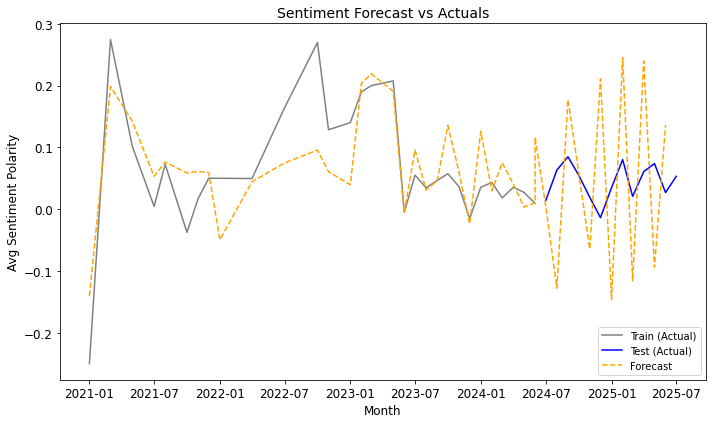

In [174]:
# Step 1: Prepare time series
df["created_utc"] = pd.to_datetime(df["created_utc"])
df["created_month"] = df["created_utc"].dt.to_period("M").dt.to_timestamp()
df_ts = df.groupby("created_month")["sentiment_polarity"].mean().reset_index()
df_ts.columns = ["ds", "y"]

# Step 2: Split last 12 months as test
split_date = df_ts["ds"].max() - pd.DateOffset(months=12)
train_df = df_ts[df_ts["ds"] < split_date]
test_df = df_ts[df_ts["ds"] >= split_date]

# Step 3: Train Prophet
model = Prophet()
model.fit(train_df)

# Step 4: Forecast into test period
future = model.make_future_dataframe(periods=len(test_df), freq='M')
forecast = model.predict(future)

# Step 5: Evaluate forecast if test data exists
# Ensure both sides are monthly datetime with no time component
forecast["ds"] = pd.to_datetime(forecast["ds"]).dt.to_period("M").dt.to_timestamp()
test_df["ds"] = pd.to_datetime(test_df["ds"]).dt.to_period("M").dt.to_timestamp()

# Now merge
forecast_eval = forecast[["ds", "yhat"]].merge(test_df, on="ds", how="inner")

if forecast_eval.empty:
    print("No test data matched forecast. Check timestamp alignment.")
else:
    # Calculate metrics
    mae = mean_absolute_error(forecast_eval["y"], forecast_eval["yhat"])
    rmse = mean_squared_error(forecast_eval["y"], forecast_eval["yhat"], squared=False)

    print(f"Forecast Evaluation on Last 12 Months:")
    print(f"MAE  = {mae:.4f}")
    print(f"RMSE = {rmse:.4f}")

# Step 6: Plot everything
plt.figure(figsize=(10, 6))
plt.plot(train_df["ds"], train_df["y"], label="Train (Actual)", color="gray")
plt.plot(test_df["ds"], test_df["y"], label="Test (Actual)", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="orange", linestyle="--")
plt.title("Sentiment Forecast vs Actuals", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Avg Sentiment Polarity", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [175]:
# Forecast evaluation after aligning
if not forecast_eval.empty:
    mae = mean_absolute_error(forecast_eval["y"], forecast_eval["yhat"])
    rmse = mean_squared_error(forecast_eval["y"], forecast_eval["yhat"], squared=False)

    print(f"Forecast Evaluation on Test Period:")
    print(f"MAE  = {mae:.4f}")
    print(f"RMSE = {rmse:.4f}")
else:
    print("Still no match — check if test_df has valid timestamps.")

Forecast Evaluation on Test Period:
MAE  = 0.1288
RMSE = 0.1454


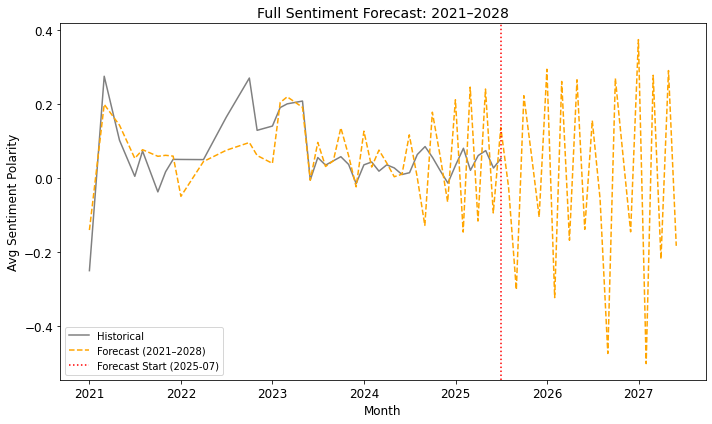

In [176]:
# Extend Prophet for next 36 months
future_3y = model.make_future_dataframe(periods=36, freq='M')
forecast_3y = model.predict(future_3y)

# Plot full forecast including future
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_ts["ds"], df_ts["y"], label="Historical", color="gray")
plt.plot(forecast_3y["ds"], forecast_3y["yhat"], label="Forecast (2021–2028)", color="orange", linestyle="--")
plt.axvline(x=df_ts["ds"].max(), color="red", linestyle=":", label="Forecast Start (2025-07)")
plt.title("Full Sentiment Forecast: 2021–2028", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Avg Sentiment Polarity", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

## Time Series Analysis and Social media analysis

In [177]:
# Load the cleaned suicide data
suicide_df = pd.read_csv("UK_Suicide_cleaned.csv")

# Debug: check original Year values
print("Unique values in 'Year' column before conversion:")
print(suicide_df["Year"].unique())

# Ensure 'Year' column is numeric
suicide_df["Year"] = pd.to_numeric(suicide_df["Year"], errors="coerce")

# Drop rows where Year couldn't be converted
suicide_df = suicide_df.dropna(subset=["Year"])
suicide_df["Year"] = suicide_df["Year"].astype(int)

# Filter for years 2021 to 2023 only
suicide_filtered = suicide_df[suicide_df["Year"].between(2021, 2023)]

# Aggregate by year: total deaths and average rate
suicide_yearly = suicide_filtered.groupby("Year").agg({
    "Deaths": "sum",
    "Rate (per 100,000)": "mean"  # Assuming this column exists exactly as is
}).reset_index()

# Rename columns for clarity
suicide_yearly.columns = ["Year", "Suicide_Deaths", "Suicide_Rate(per 100,000)"]

# Display the result
print("Aggregated UK Suicide Data (2021–2023):")
print(suicide_yearly)


Unique values in 'Year' column before conversion:
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023]
Aggregated UK Suicide Data (2021–2023):
   Year  Suicide_Deaths  Suicide_Rate(per 100,000)
0  2021            6521                   14.67725
1  2022            6552                   14.65525
2  2023            7003                   15.36225


In [178]:
reddit_agg = df.groupby("year").agg(
    num_posts=("post_text", "count"),
    avg_sentiment=("sentiment_polarity", "mean")
).reset_index()
reddit_agg.rename(columns={"year": "Year"}, inplace=True)


#### Merging Reddit-Derived Features with Annual Suicide Data

To integrate aggregated Reddit indicators (reddit_agg) with official suicide statistics (suicide_yearly) on a common yearly basis, enabling subsequent correlation and predictive analysis.

In [179]:
# Then merge with suicide_yearly (not raw suicide_df)
merged_df = pd.merge(reddit_agg, suicide_yearly, on="Year", how="inner")

In [180]:
merged_df

,Year,num_posts,avg_sentiment,Suicide_Deaths,"Suicide_Rate(per 100,000)"
0,2021,20,0.036345,6521,14.67725
1,2022,5,0.132420,6552,14.65525
2,2023,197,0.038251,7003,15.36225


#### Pairwise Relationships

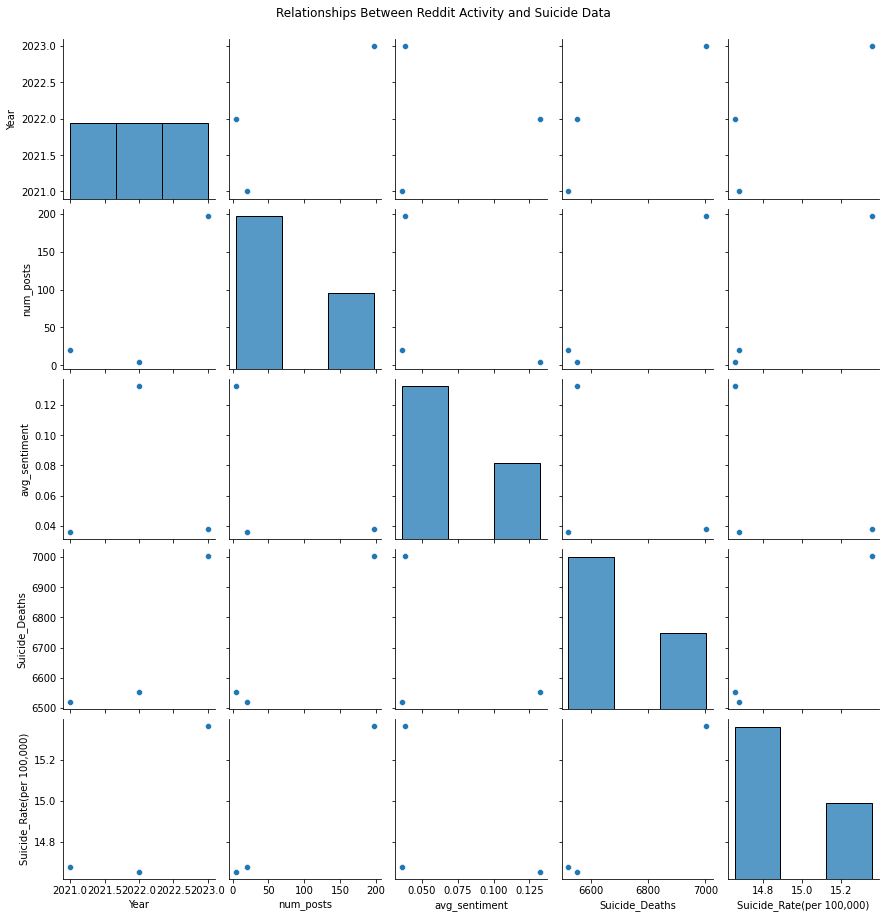

Correlation Matrix:


,Year,num_posts,avg_sentiment,Suicide_Deaths,"Suicide_Rate(per 100,000)"
Year,1.000000,0.828769,0.017353,0.893322,0.852019
num_posts,0.828769,1.000000,-0.545125,0.991847,0.999079
avg_sentiment,0.017353,-0.545125,1.000000,-0.433848,-0.508647
Suicide_Deaths,0.893322,0.991847,-0.433848,1.000000,0.996402
"Suicide_Rate(per 100,000)",0.852019,0.999079,-0.508647,0.996402,1.000000


In [181]:
sns.pairplot(merged_df)
plt.suptitle("Relationships Between Reddit Activity and Suicide Data", y=1.02)
plt.show()

# Correlation matrix
corr_matrix = merged_df.corr(numeric_only=True)

# Display as table
print("Correlation Matrix:")
display(corr_matrix)

#### Correlation Analysis Between Reddit Sentiment and Suicide Metrics

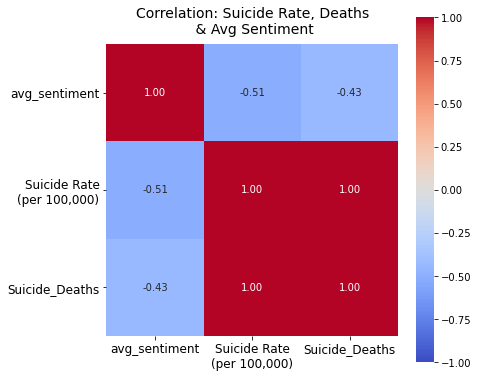

In [182]:
corr_df = merged_df[["avg_sentiment", "Suicide_Rate(per 100,000)", "Suicide_Deaths"]]

# Rename columns for multi-line or nicer labels
corr_df = corr_df.rename(columns={
    "Suicide_Rate(per 100,000)": "Suicide Rate\n(per 100,000)",
})

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",vmin=-1,vmax=1,square=True,
            cbar_kws={"shrink": 0.75})

# White labels, horizontal axis text
plt.title("Correlation: Suicide Rate, Deaths\n & Avg Sentiment", pad=10, fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout(pad=2)
plt.show()


#### Forecasting 2023 Suicide Rate Using the Suicide-Only Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


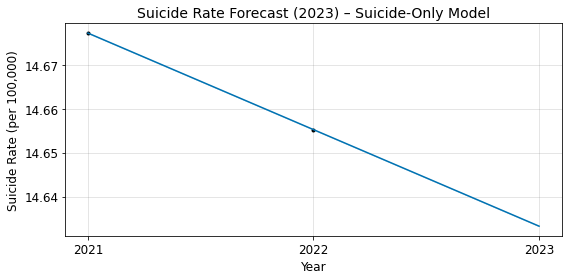

In [183]:
# Model A – Suicide-only forecast
# Predict 2023 suicide rate from 2021/2022 suicide data

# Use only 2021 & 2022 data to predict 2023
df_prophet = suicide_yearly[suicide_yearly["Year"] < 2023].copy()

# Prophet requires columns: ds (date), y (value)
df_prophet["ds"] = pd.to_datetime(df_prophet["Year"].astype(str))
df_prophet["y"] = suicide_yearly.loc[suicide_yearly["Year"] < 2023, "Suicide_Rate(per 100,000)"]

df_prophet = df_prophet[["ds", "y"]]

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=1, freq='YS')  # Predict only 2023
forecast = model.predict(future)

fig = model.plot(forecast, figsize=(8, 4))
ax = fig.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Customize title and axis labels

plt.title("Suicide Rate Forecast (2023) – Suicide-Only Model", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Suicide Rate (per 100,000)", fontsize=12)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()


2023 Suicide Rate Prediction and Error – Suicide-Only Model

In [184]:
forecast_2023 = forecast[forecast["ds"].dt.year >= 2023]
predicted_2023_a_rate = forecast_2023["yhat"].values[0]
print(f"Predicted Suicide Rate in 2023 (Suicide-only model): {predicted_2023_a_rate:.2f}")

Predicted Suicide Rate in 2023 (Suicide-only model): 14.63


In [185]:
actual_2023 = suicide_yearly[suicide_yearly["Year"] == 2023]["Suicide_Rate(per 100,000)"].values[0]
print(f"Actual Suicide Rate in 2023: {actual_2023:.2f}")

error_model_a = abs(actual_2023 - predicted_2023_a_rate)
print(f"Absolute Error: {error_model_a:.2f}")

Actual Suicide Rate in 2023: 15.36
Absolute Error: 0.73


#### Suicide Rate Prediction Using Sentiment and Reddit Activity (No Lag)

Model B – Linear Regression (Sentiment + Posts, No Lag):
MSE: 2.1036290805893647e-30
R²: 1.0


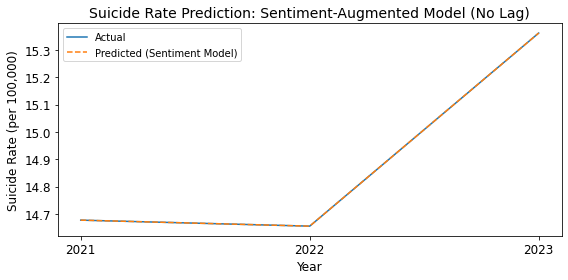

In [186]:
# Use current year's sentiment and posts (no lag)
X = merged_df[["avg_sentiment", "num_posts"]]
y = merged_df["Suicide_Rate(per 100,000)"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Model B – Linear Regression (Sentiment + Posts, No Lag):")
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

# Convert Year to datetime for proper date axis
dates = pd.to_datetime(merged_df["Year"].astype(str) + "-01-01")

plt.figure(figsize=(8,4))
plt.plot(dates, y, label="Actual")
plt.plot(dates, y_pred, label="Predicted (Sentiment Model)", linestyle="--")

plt.legend()
plt.title("Suicide Rate Prediction: Sentiment-Augmented Model (No Lag)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Suicide Rate (per 100,000)", fontsize=12)

ax = plt.gca()

# Set x-axis to yearly ticks and year labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()


2023 Suicide Rate Prediction and Error – Sentiment-Augmented Model

In [187]:
model_b_2023 = merged_df[merged_df["Year"] == 2023].copy()

# Get predicted 2023 rate from model B
predicted_2023_b_rate = model.predict(model_b_2023[["avg_sentiment", "num_posts"]])[0]

print(f"Predicted Suicide Rate in 2023 (Sentiment model): {predicted_2023_b_rate:.2f}")


Predicted Suicide Rate in 2023 (Sentiment model): 15.36


In [188]:
# Get actual 2023 suicide rate (same as used for Model A)
actual_2023 = suicide_yearly[suicide_yearly["Year"] == 2023]["Suicide_Rate(per 100,000)"].values[0]
print(f"Actual Suicide Rate in 2023: {actual_2023:.2f}")

# Compute absolute error
error_model_b = abs(actual_2023 - predicted_2023_b_rate)
print(f"Absolute Error: {error_model_b:.2f}")


Actual Suicide Rate in 2023: 15.36
Absolute Error: 0.00


Comparison of 2023 Suicide Rate Predictions: Model A vs Model B

In [189]:
results = pd.DataFrame({
    "Model": ["Prophet (Suicide-only)", "Linear Regression (Sentiment + Posts)"],
    "Predicted 2023": [predicted_2023_a_rate, predicted_2023_b_rate],
    "Actual 2023": [actual_2023, actual_2023],
    "Absolute Error": [error_model_a, error_model_b]
})

results


,Model,Predicted 2023,Actual 2023,Absolute Error
0,Prophet (Suicide-only),14.63325,15.36225,0.729
1,Linear Regression (Sentiment + Posts),15.36225,15.36225,0.000


In [190]:
from tabulate import tabulate

results = [
    ["Prophet (Suicide-only)", predicted_2023_a_rate, actual_2023, error_model_a],
    ["Linear Regression\n(Sentiment + Posts)", predicted_2023_b_rate, actual_2023, error_model_b]
]

headers = ["Model", "Predicted 2023", "Actual 2023", "Absolute Error"]

print(tabulate(results, headers, tablefmt="grid"))


+------------------------+------------------+---------------+------------------+
| Model                  |   Predicted 2023 |   Actual 2023 |   Absolute Error |
+========================+==================+===============+==================+
| Prophet (Suicide-only) |          14.6332 |       15.3622 |            0.729 |
+------------------------+------------------+---------------+------------------+
| Linear Regression      |          15.3622 |       15.3622 |            0     |
| (Sentiment + Posts)    |                  |               |                  |
+------------------------+------------------+---------------+------------------+


#### 5-Year Suicide Rate Forecast Using Sentiment-Augmented Model (Model B)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



5-Year Forecast (Model B – Sentiment + Posts):
   Year  Predicted_Suicide_Rate
0  2024               15.581884
1  2025               15.787119
2  2026               16.127852
3  2027               16.469411
4  2028               16.811752


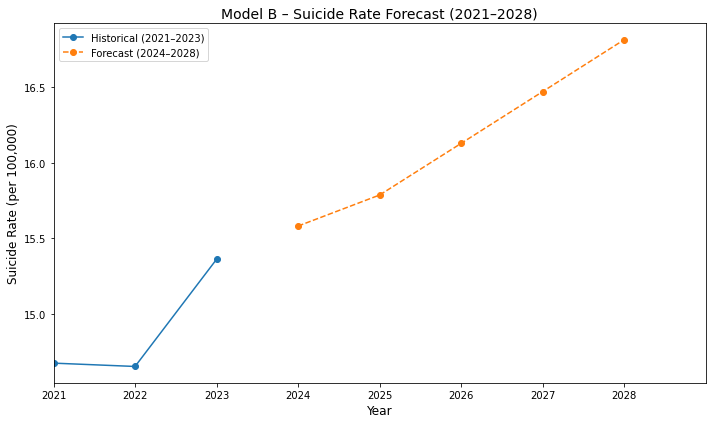

In [191]:
def forecast_future_feature(df, feature, years_ahead=5):
    # Prepare data
    feature_df = df[["Year", feature]].copy()
    feature_df["ds"] = pd.to_datetime(feature_df["Year"].astype(str) + "-01-01")
    feature_df["y"] = feature_df[feature]
    feature_df = feature_df[["ds", "y"]]

    # Fit Prophet
    model = Prophet()
    model.fit(feature_df)

    # Create future dataframe
    future = model.make_future_dataframe(periods=years_ahead, freq="YS")
    forecast = model.predict(future)

    # Return only the future predictions
    return forecast[["ds", "yhat"]].tail(years_ahead)

future_sentiment = forecast_future_feature(merged_df, "avg_sentiment", years_ahead=5)
future_posts = forecast_future_feature(merged_df, "num_posts", years_ahead=5)

future_features = future_sentiment.merge(future_posts, on="ds", suffixes=("_sentiment", "_posts"))
future_features["Year"] = future_features["ds"].dt.year

# Rename columns to match training feature names
future_features = future_features.rename(columns={
    "yhat_sentiment": "avg_sentiment",
    "yhat_posts": "num_posts"
})

# Predict with the trained model
future_predictions = model.predict(future_features[["avg_sentiment", "num_posts"]])
future_features["Predicted_Suicide_Rate"] = future_predictions

print("\n5-Year Forecast (Model B – Sentiment + Posts):")
print(future_features[["Year", "Predicted_Suicide_Rate"]])

# Prepare historical data filtered from 2021 onward for plotting
historical_recent = merged_df[merged_df["Year"] >= 2021].copy()
historical_dates = pd.to_datetime(historical_recent["Year"].astype(str) + "-01-01")
historical_y = historical_recent["Suicide_Rate(per 100,000)"]

# Plot
plt.figure(figsize=(10,6))
plt.plot(historical_dates, historical_y, label="Historical (2021–2023)", marker='o')
plt.plot(pd.to_datetime(future_features["Year"].astype(str) + "-01-01"),
         future_features["Predicted_Suicide_Rate"],
         label="Forecast (2024–2028)", linestyle="--", marker='o')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Suicide Rate (per 100,000)", fontsize=12)
plt.title("Model B – Suicide Rate Forecast (2021–2028)", fontsize=14)
plt.legend()

plt.xlim(pd.Timestamp("2021-01-01"), pd.Timestamp("2028-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


#### 5-Year Suicide Rate Forecast Comparison: Model A vs Model B

Compare predictive performance of a simple historical-data-only model versus a model incorporating social media features.
Visualize future trends and assess whether including sentiment/posts improves forecast plausibility.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish cha


Combined 5-Year Forecasts (2024-2028):
   Year  Predicted_Suicide_Rate_Model_A  Predicted_Suicide_Rate_Model_B
0  2024                       16.314026                       15.581884
1  2025                       15.938834                       15.787119
2  2026                       16.400839                       16.127852
3  2027                       17.107838                       16.469411
4  2028                       18.059511                       16.811752


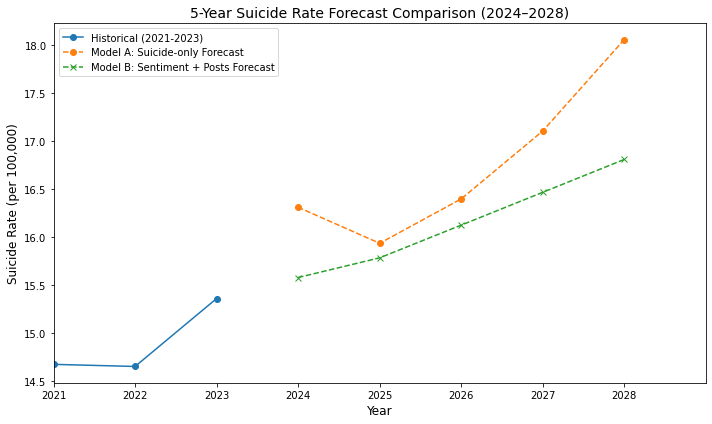

In [192]:
# --- Forecast Model A (Suicide-only with Prophet) ---
def forecast_suicide_rate(df, years_ahead=5):
    df_prophet = df[["Year", "Suicide_Rate(per 100,000)"]].copy()
    df_prophet["ds"] = pd.to_datetime(df_prophet["Year"].astype(str) + "-01-01")
    df_prophet["y"] = df_prophet["Suicide_Rate(per 100,000)"]
    df_prophet = df_prophet[["ds", "y"]]

    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=years_ahead, freq='YS')
    forecast = model.predict(future)

    # Return only forecast years
    forecast_5yr = forecast[forecast["ds"].dt.year > df["Year"].max()][["ds", "yhat"]]
    forecast_5yr["Year"] = forecast_5yr["ds"].dt.year
    return forecast_5yr[["Year", "yhat"]]

# --- Forecast features (sentiment and posts) for Model B ---
def forecast_future_feature(df, feature, years_ahead=5):
    feature_df = df[["Year", feature]].copy()
    feature_df["ds"] = pd.to_datetime(feature_df["Year"].astype(str) + "-01-01")
    feature_df["y"] = feature_df[feature]
    feature_df = feature_df[["ds", "y"]]

    model = Prophet()
    model.fit(feature_df)

    future = model.make_future_dataframe(periods=years_ahead, freq="YS")
    forecast = model.predict(future)

    # Only future years
    forecast_5yr = forecast[forecast["ds"].dt.year > df["Year"].max()][["ds", "yhat"]]
    forecast_5yr["Year"] = forecast_5yr["ds"].dt.year
    return forecast_5yr[["Year", "yhat"]]

# --- Generate forecasts for features ---
future_sentiment = forecast_future_feature(merged_df, "avg_sentiment", years_ahead=5)
future_posts = forecast_future_feature(merged_df, "num_posts", years_ahead=5)

# Merge feature forecasts
future_features = future_sentiment.merge(future_posts, on="Year", suffixes=("_sentiment", "_posts"))

# Rename columns to match model input
future_features = future_features.rename(columns={
    "yhat_sentiment": "avg_sentiment",
    "yhat_posts": "num_posts"
})

# --- Train linear regression model on all available data ---
from sklearn.linear_model import LinearRegression

X_train = merged_df[["avg_sentiment", "num_posts"]]
y_train = merged_df["Suicide_Rate(per 100,000)"]
model_b = LinearRegression()
model_b.fit(X_train, y_train)

# Predict suicide rate for future 5 years using forecasted features
future_features["Predicted_Suicide_Rate_Model_B"] = model_b.predict(future_features[["avg_sentiment", "num_posts"]])

# --- Forecast suicide rates with Model A ---
future_model_a = forecast_suicide_rate(suicide_yearly, years_ahead=5)
future_model_a = future_model_a.rename(columns={"yhat": "Predicted_Suicide_Rate_Model_A"})

# --- Combine forecasts for comparison ---
combined_forecast = future_model_a.merge(future_features[["Year", "Predicted_Suicide_Rate_Model_B"]], on="Year")

print("\nCombined 5-Year Forecasts (2024-2028):")
print(combined_forecast)

# --- Plotting ---
# Filter historical data from 2021 onwards
historical_recent = merged_df[merged_df["Year"] >= 2021].copy()
historical_dates = pd.to_datetime(historical_recent["Year"].astype(str) + "-01-01")
historical_y = historical_recent["Suicide_Rate(per 100,000)"]

plt.figure(figsize=(10,6))
plt.plot(historical_dates, historical_y, label="Historical (2021-2023)", marker="o")

plt.plot(pd.to_datetime(combined_forecast["Year"].astype(str) + "-01-01"),
         combined_forecast["Predicted_Suicide_Rate_Model_A"],
         label="Model A: Suicide-only Forecast", linestyle="--", marker="o")

plt.plot(pd.to_datetime(combined_forecast["Year"].astype(str) + "-01-01"),
         combined_forecast["Predicted_Suicide_Rate_Model_B"],
         label="Model B: Sentiment + Posts Forecast", linestyle="--", marker="x")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Suicide Rate (per 100,000)", fontsize=12)
plt.title("5-Year Suicide Rate Forecast Comparison (2024–2028)", fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

plt.legend()

plt.xlim(pd.Timestamp("2021-01-01"), pd.Timestamp("2028-12-31"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.tight_layout()
plt.show()
